<a href="https://colab.research.google.com/github/coded-sly/Data-Scientist-Professional-Certification/blob/data-scientist-professional-certification/DS_FINAL_SUBMIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

## 1. Data Validation ✅
The dataset contains 947 rows and 8 columns, performed the necessary validation process that ensures the accuracy, quality, and reliability of data before analysis:
- **recipe:** integer, unique values, no duplicates.
- **calories:** float data, dropped 52 missing values
- **carbohydrate:** float data, dropped 52 missing values
- **sugar:** float data, dropped 52 missing values
- **protein:** float data, dropped 52 missing values
- **category:** category, found 11 items instead of 10 as mentioned by the product manager, with 'Chicken Breast' as the extra. Replaced it with 'Chicken', converted to category.
- **servings:** column had mixed data types. Stripped text " as a snack" and converted to integer.
- **high_traffic:** replaced NaN with "Low" to indicate low traffic.

### Validation & Cleaning steps:

  - Identifying missingness in columns.
  - Analyze patterns in the missingness to determine if it's random or correlated with other variables.
  - Quantifying the amount of missing data to assess its impact on our analysis.

These insights will guide in selecting appropriate techniques for handling missing values and transforming data types, ensuring the robustness of our subsequent analysis.

In [ ]:
# Start coding here...

# Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import missingno as msno
from sklearn.preprocessing import PowerTransformer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
)

In [ ]:
# Set plot style
plt.style.use("ggplot")

Preview Dataframe

In [ ]:
# Load data into dataframe
data = "recipe_site_traffic_2212.csv"
recipe_site_traffic = pd.read_csv(data)
recipe_site_traffic.head()

recipe  calories  carbohydrate  ...   category  servings high_traffic
0       1       NaN           NaN  ...       Pork         6         High
1       2     35.48         38.56  ...     Potato         4         High
2       3    914.28         42.68  ...  Breakfast         1          NaN
3       4     97.03         30.56  ...  Beverages         4         High
4       5     27.05          1.85  ...  Beverages         4          NaN

[5 rows x 8 columns]

In [ ]:
recipe_site_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [ ]:
# check descriptive statistics
print(recipe_site_traffic.describe())

           recipe     calories  carbohydrate       sugar     protein
count  947.000000   895.000000    895.000000  895.000000  895.000000
mean   474.000000   435.939196     35.069676    9.046547   24.149296
std    273.519652   453.020997     43.949032   14.679176   36.369739
min      1.000000     0.140000      0.030000    0.010000    0.000000
25%    237.500000   110.430000      8.375000    1.690000    3.195000
50%    474.000000   288.550000     21.480000    4.550000   10.800000
75%    710.500000   597.650000     44.965000    9.800000   30.200000
max    947.000000  3633.160000    530.420000  148.750000  363.360000


### Find missingness in features
 - Missing values in 5 columns **(high_traffic, calories, carbohydrate, sugar and protein)**

 - The missing values in 4 nutritional columns **(calories, carbohydrate, sugar and protein)** appear to occur for the same rows, suggesting a correlation in the missingness of these variables.

<AxesSubplot: >

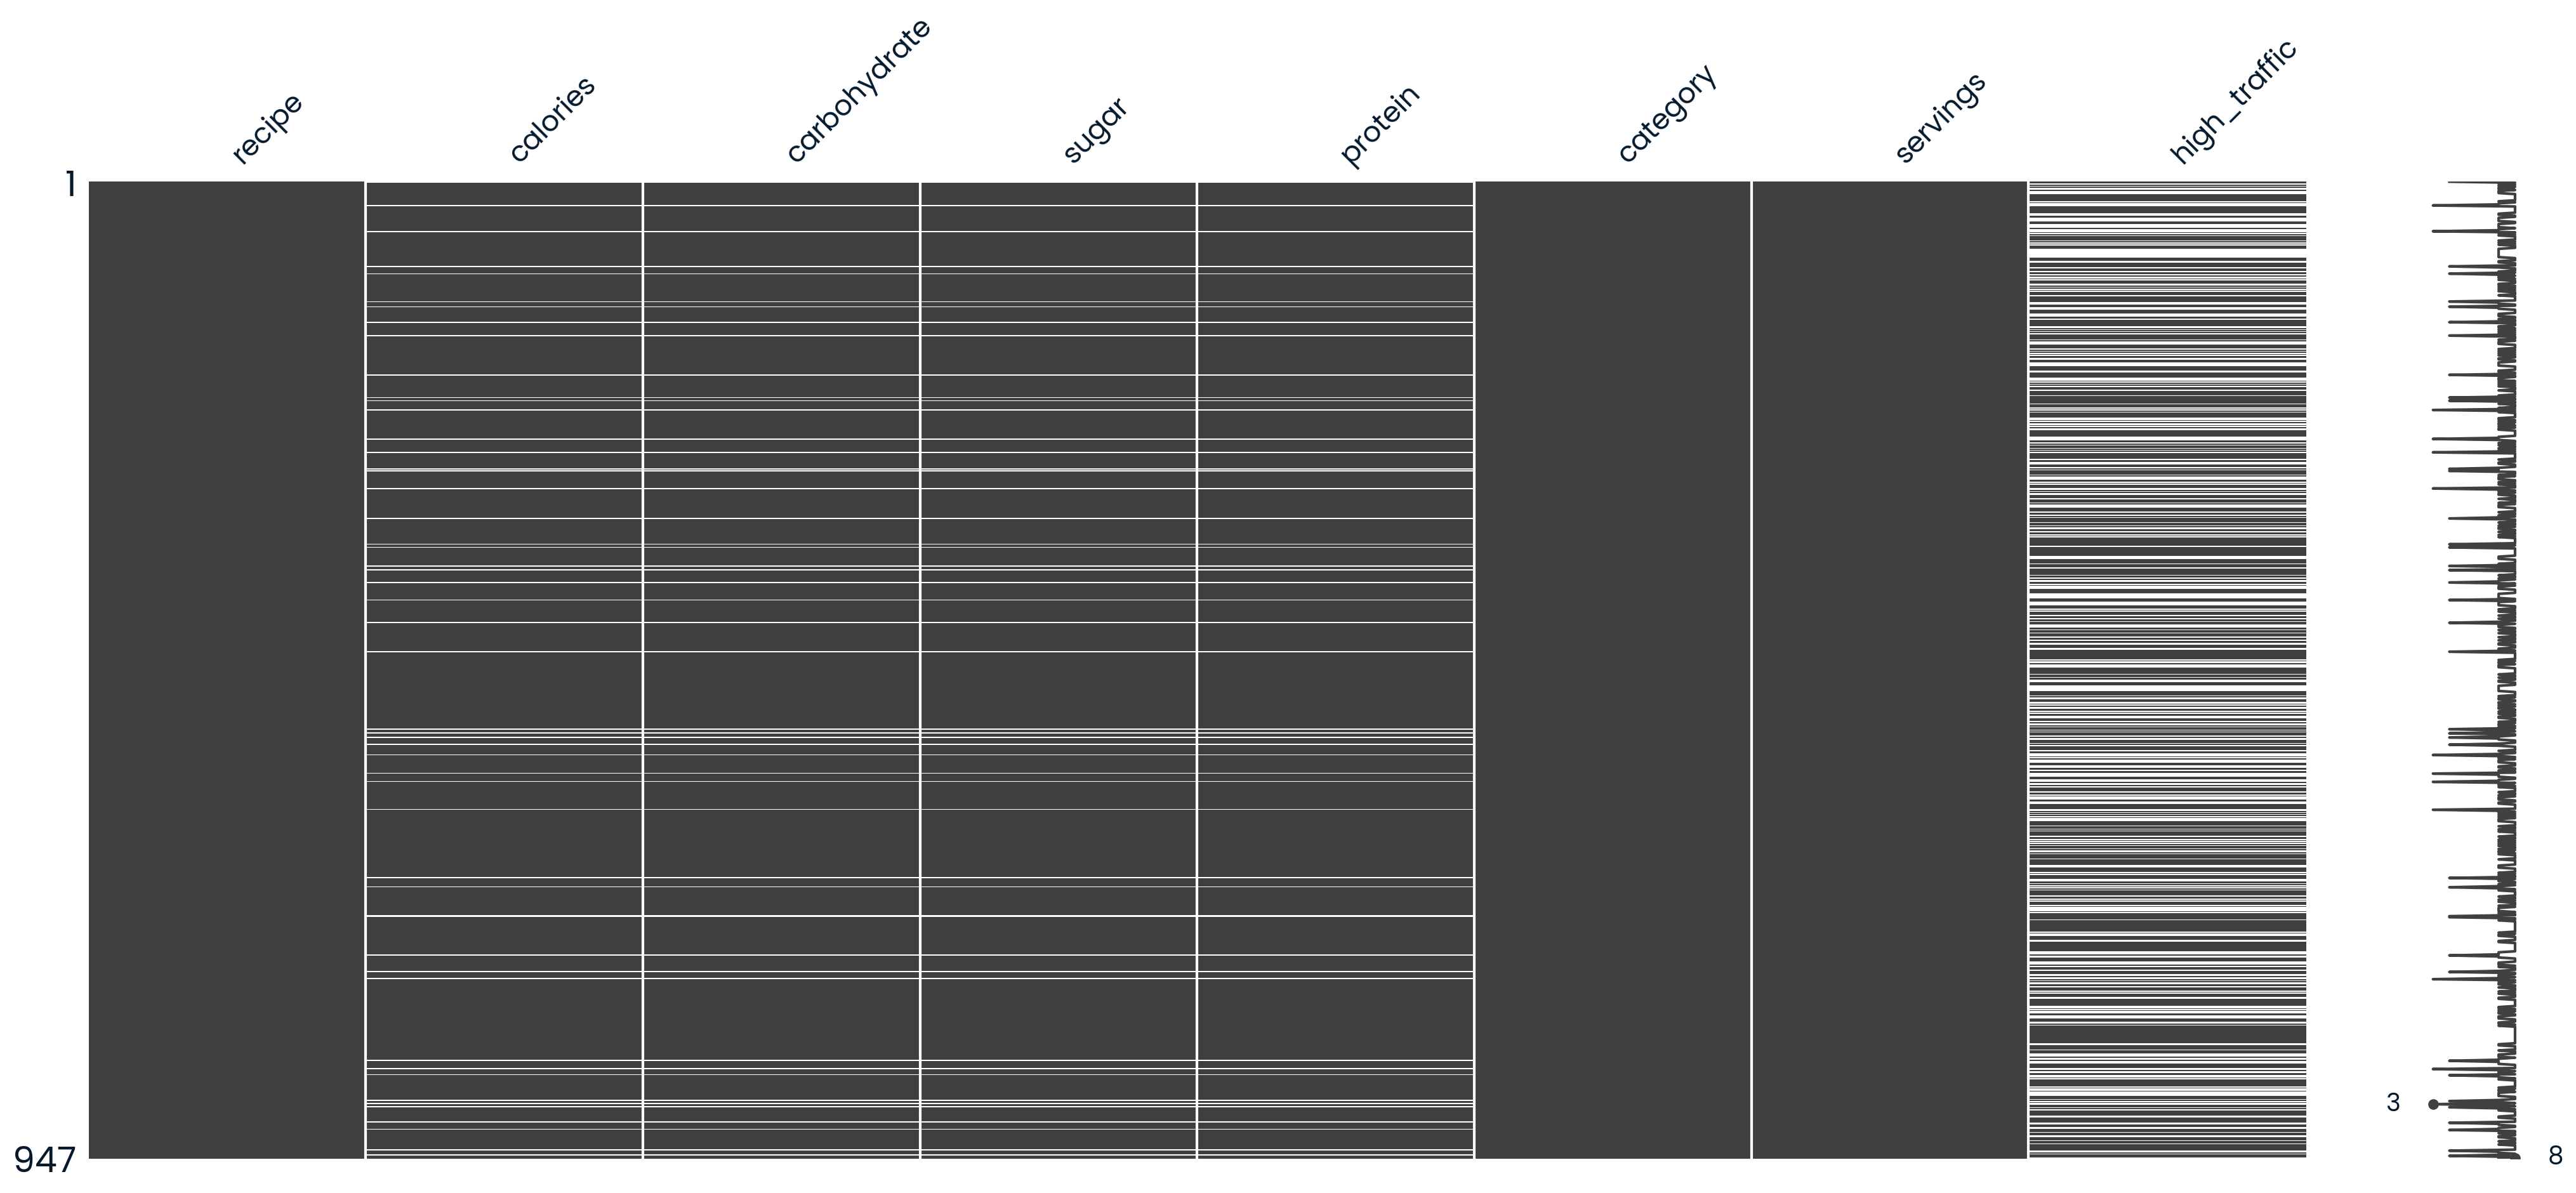

In [ ]:
# Establish patterns in missingness
msno.matrix(recipe_site_traffic)

### Find relationship in missingness
By re-examining the matrix, this time sorting by the "**calories**" column, I observed that, missingness appears to be Missing At Random (MAR), as the missing values in **(calories, carbohydrate, sugar and protein)** are correlated.

<AxesSubplot: >

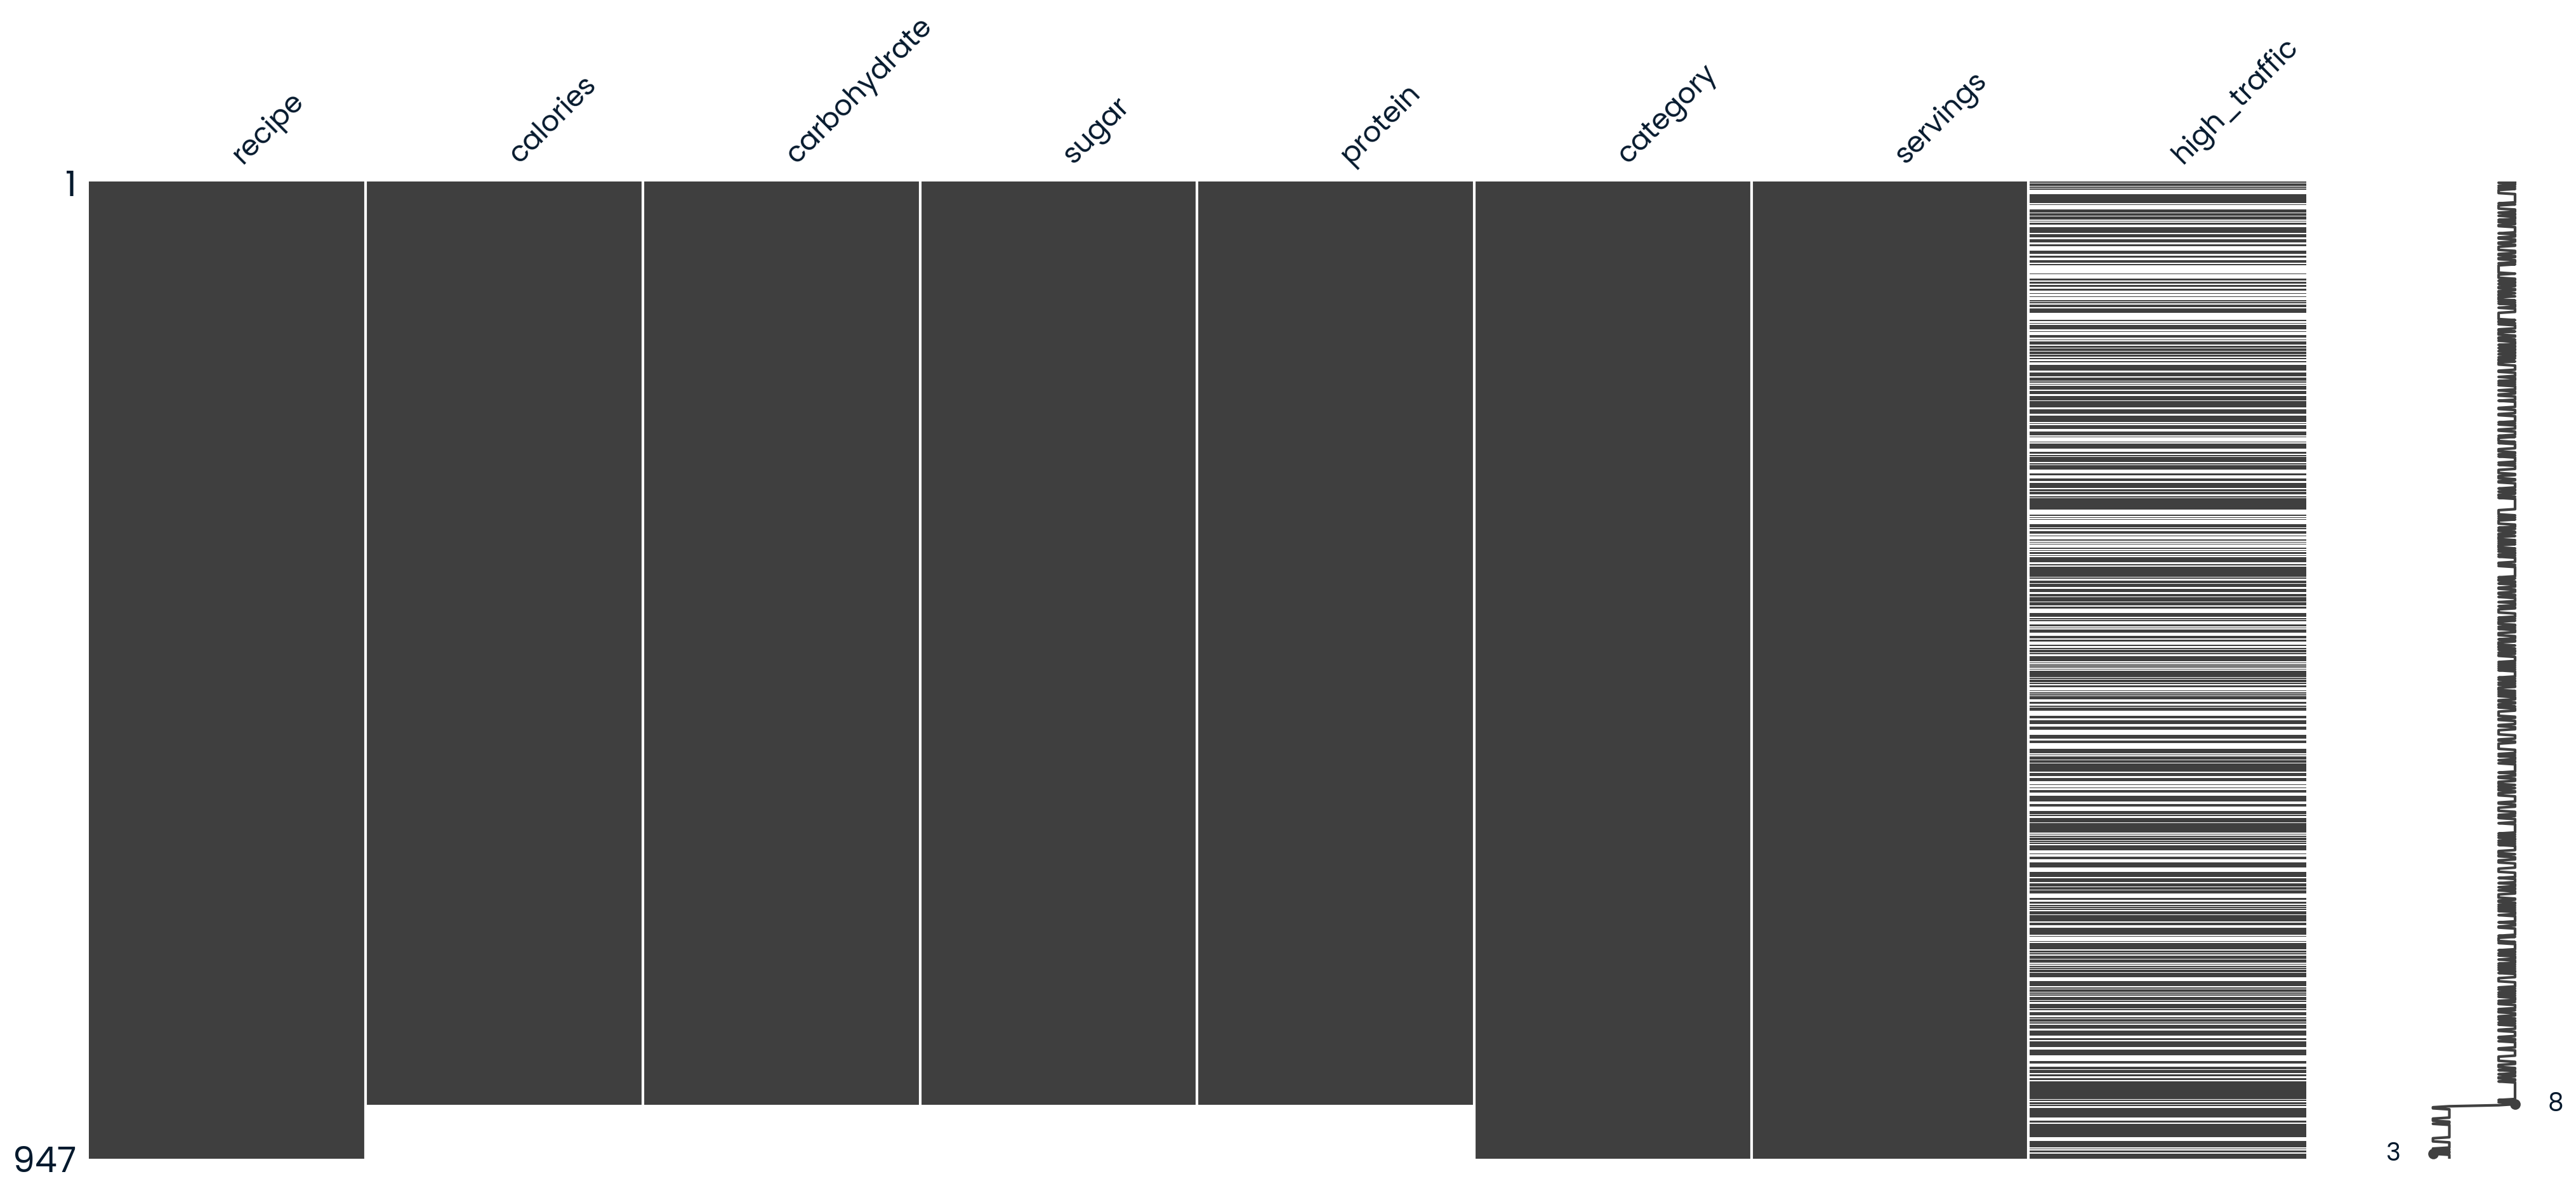

In [ ]:
# Establish relationship in missingness
msno.matrix(recipe_site_traffic.sort_values("calories"))

In [ ]:
"""high_traffic"""
# Replace all NaN with 'Low', indicating low traffic
recipe_site_traffic["high_traffic"].fillna("Low", inplace=True)

"""recipe"""
# Confirm all values are unique
assert recipe_site_traffic["recipe"].nunique() == recipe_site_traffic.shape[0]

# Confirm no duplicated values
assert recipe_site_traffic["recipe"].duplicated().sum() == 0

"""category"""
# Replace 'Chicken Breast' with 'Chicken' and convert to categorical
recipe_site_traffic["category"] = recipe_site_traffic["category"].replace("Chicken Breast", "Chicken")
recipe_site_traffic["category"] = recipe_site_traffic["category"].astype("category")

"""servings"""
# Perform strip operation by removing ' as a snack'
recipe_site_traffic["servings"] = recipe_site_traffic["servings"].str.replace(" as a snack", "")
recipe_site_traffic["servings"] = recipe_site_traffic["servings"].astype(int)

### Observation: Drop missing values
- Missing data fields constitute about 5.5% of the dataset, so we can drop them.
- 895 rows and 8 columns, after validation and cleaning

In [ ]:
# Check if missing data is less than 5% of tha dataset accross columns
print((recipe_site_traffic.isna().sum() / recipe_site_traffic.shape[0]) * 100)

recipe          0.000000
calories        5.491024
carbohydrate    5.491024
sugar           5.491024
protein         5.491024
category        0.000000
servings        0.000000
high_traffic    0.000000
dtype: float64


In [ ]:
# Drop rows with missing values
recipe_site_traffic.dropna(inplace=True)
recipe_site_traffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        895 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      895 non-null    category
 6   servings      895 non-null    int64   
 7   high_traffic  895 non-null    object  
dtypes: category(1), float64(4), int64(2), object(1)
memory usage: 57.2+ KB


## 02. Exploratory Analysis ✅
The next step is performing analysis to help understand the characteristics of the data, identify potential issues like outliers, uncover relationships between variables, and inspecting distribution of data.

Observation: Category

- The bar plot displays the count of recipes in the category column, highlighting the popularity of various meals.
- The pie chart complements this by showing the proportion of each category to the total dataset.
- In both scenarios, **Chicken** recipe (18.2%) appear most in the dataset, whereas **One Dish Meal** (7.5%) is the least common.

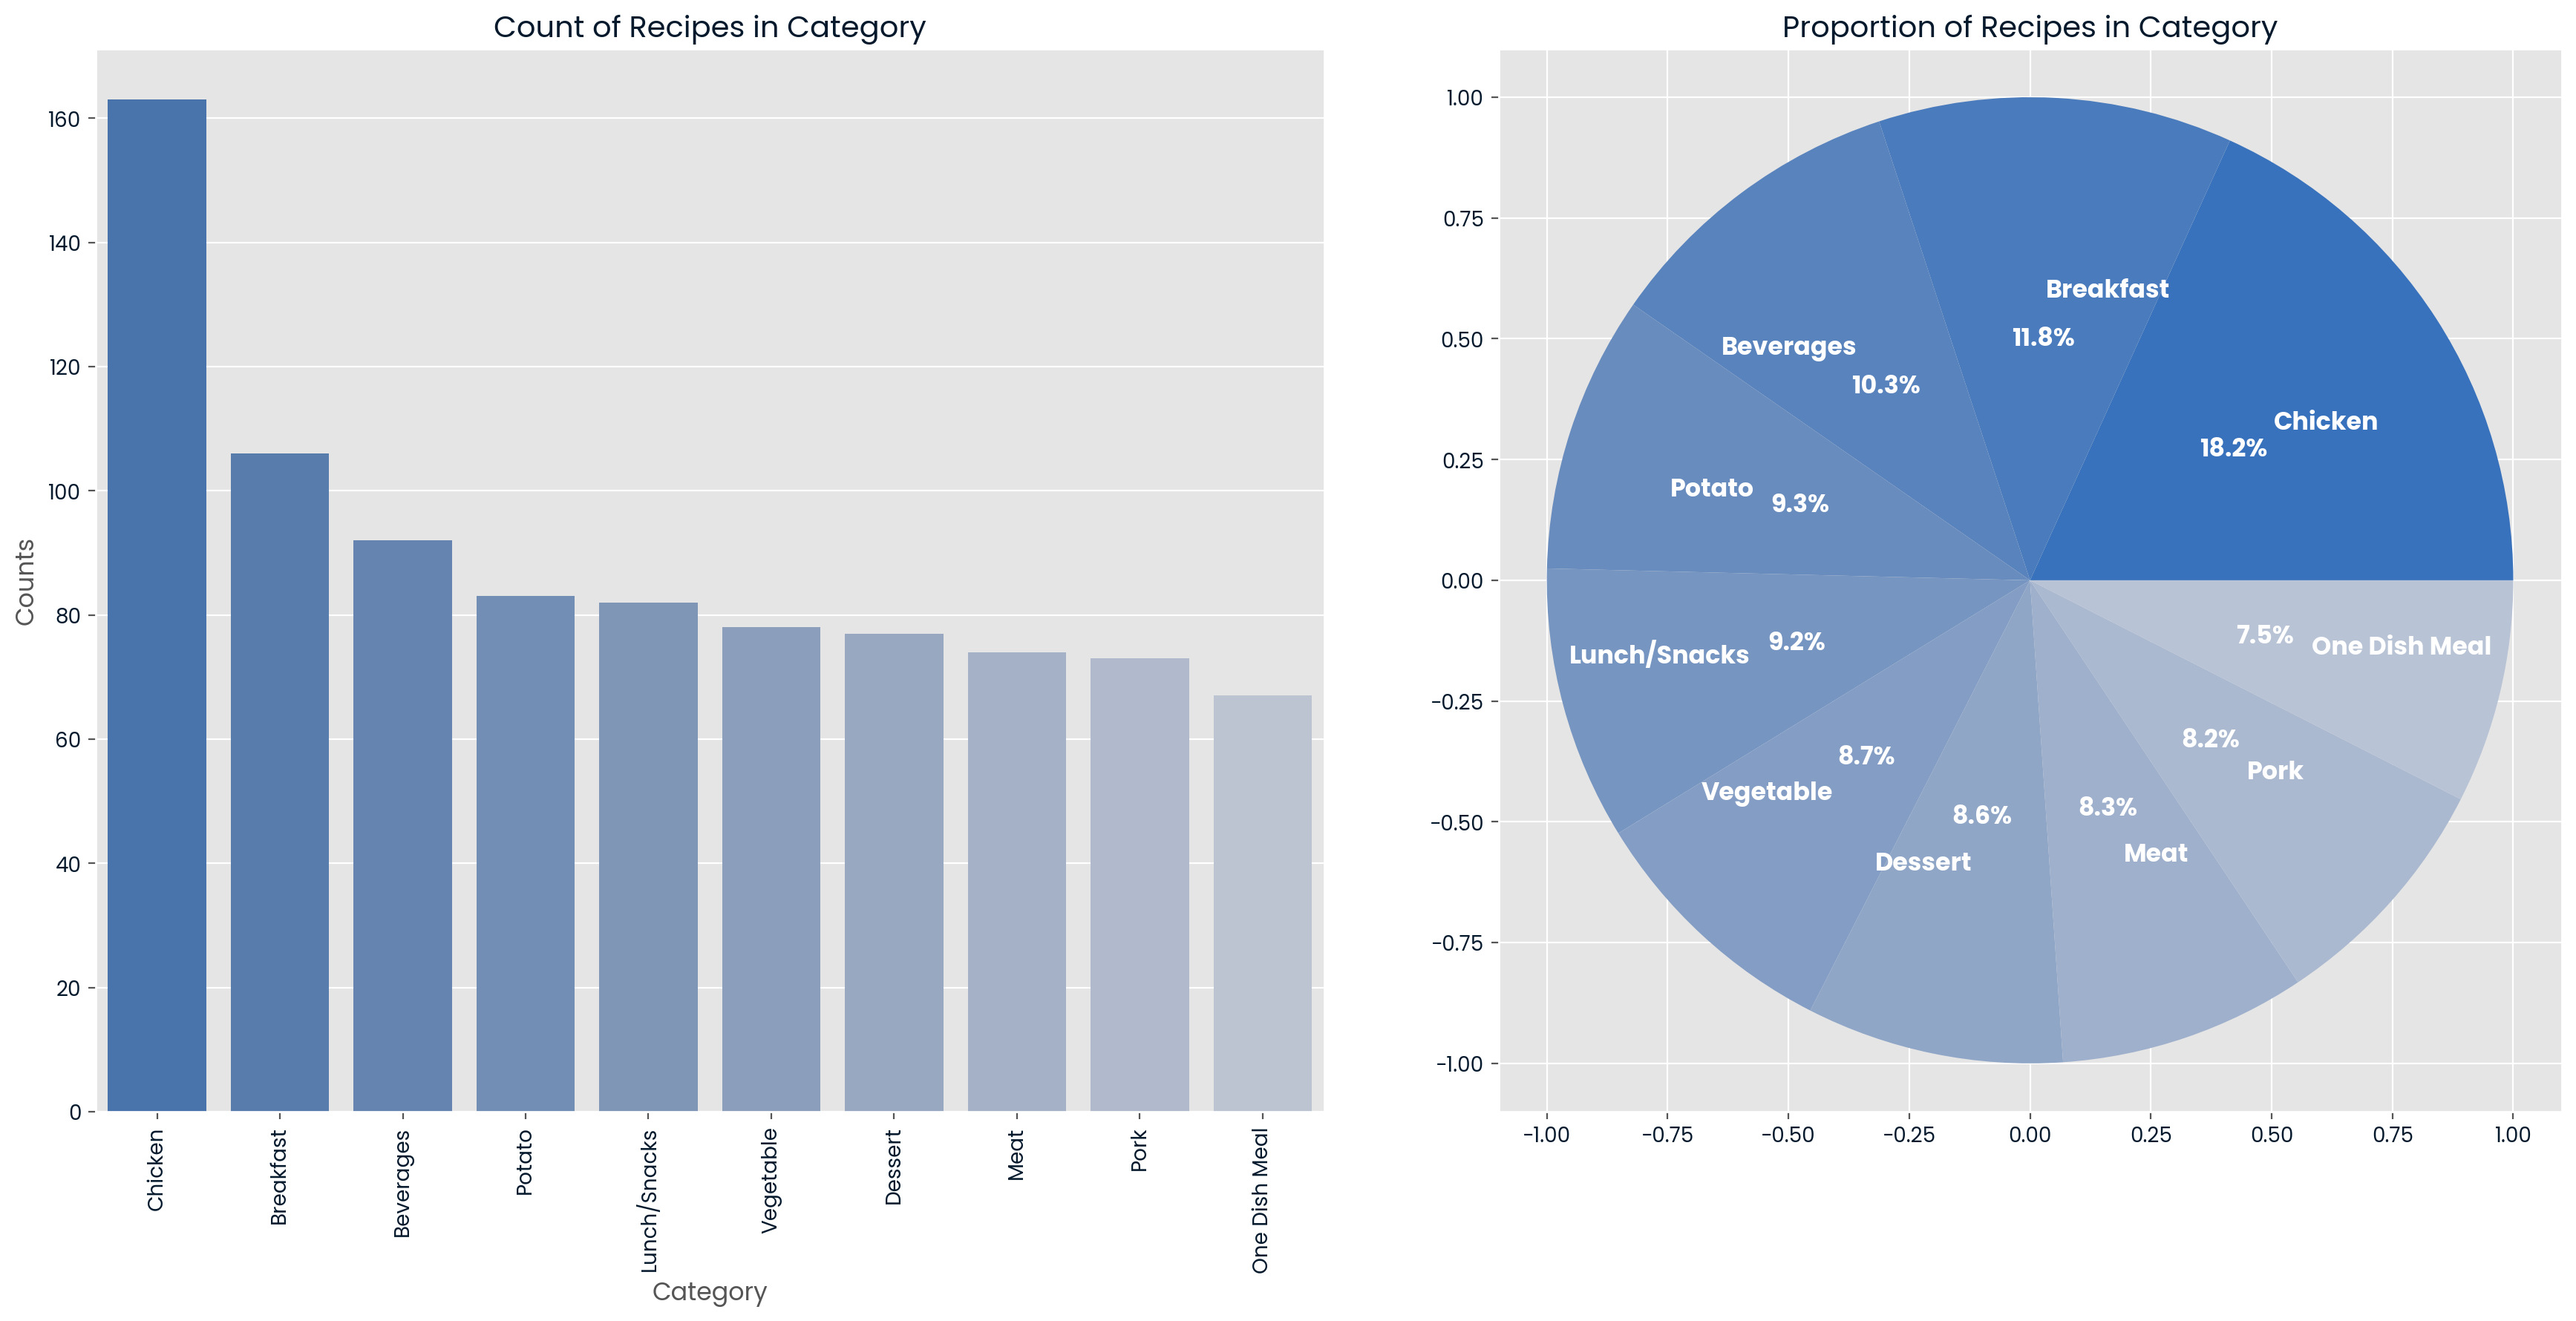

In [ ]:
# Subset category column and labels
category = recipe_site_traffic["category"].value_counts()
labels = category.index

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
palette = sns.color_palette("vlag", 30)

# Barplot of category counts
sns.barplot(category, palette=palette, order=labels, ax=axes[0])
axes[0].set_title("Count of Recipes in Category")
axes[0].set_xlabel("Category")
axes[0].set_ylabel("Counts")
axes[0].tick_params(axis="x", rotation=90)

# Pie chart of category proportions
axes[1].pie(
    category,
    frame=True,
    labels=labels,
    colors=palette,
    textprops={"fontsize": 12, "color": "white", "weight": "bold"},
    autopct="%1.1f%%",
    pctdistance=0.5,
    labeldistance=0.6,
)
axes[1].set_title("Proportion of Recipes in Category")
plt.tight_layout()

Observation: Servings

- The bar plot displays the total count of each servings in the dataset.
- The pie chart complements this by showing proportion of each serving.
- In both scenarios, **4-servings** (41%) appear most in the dataset, whereas **1-serving** (19%) is the least common.

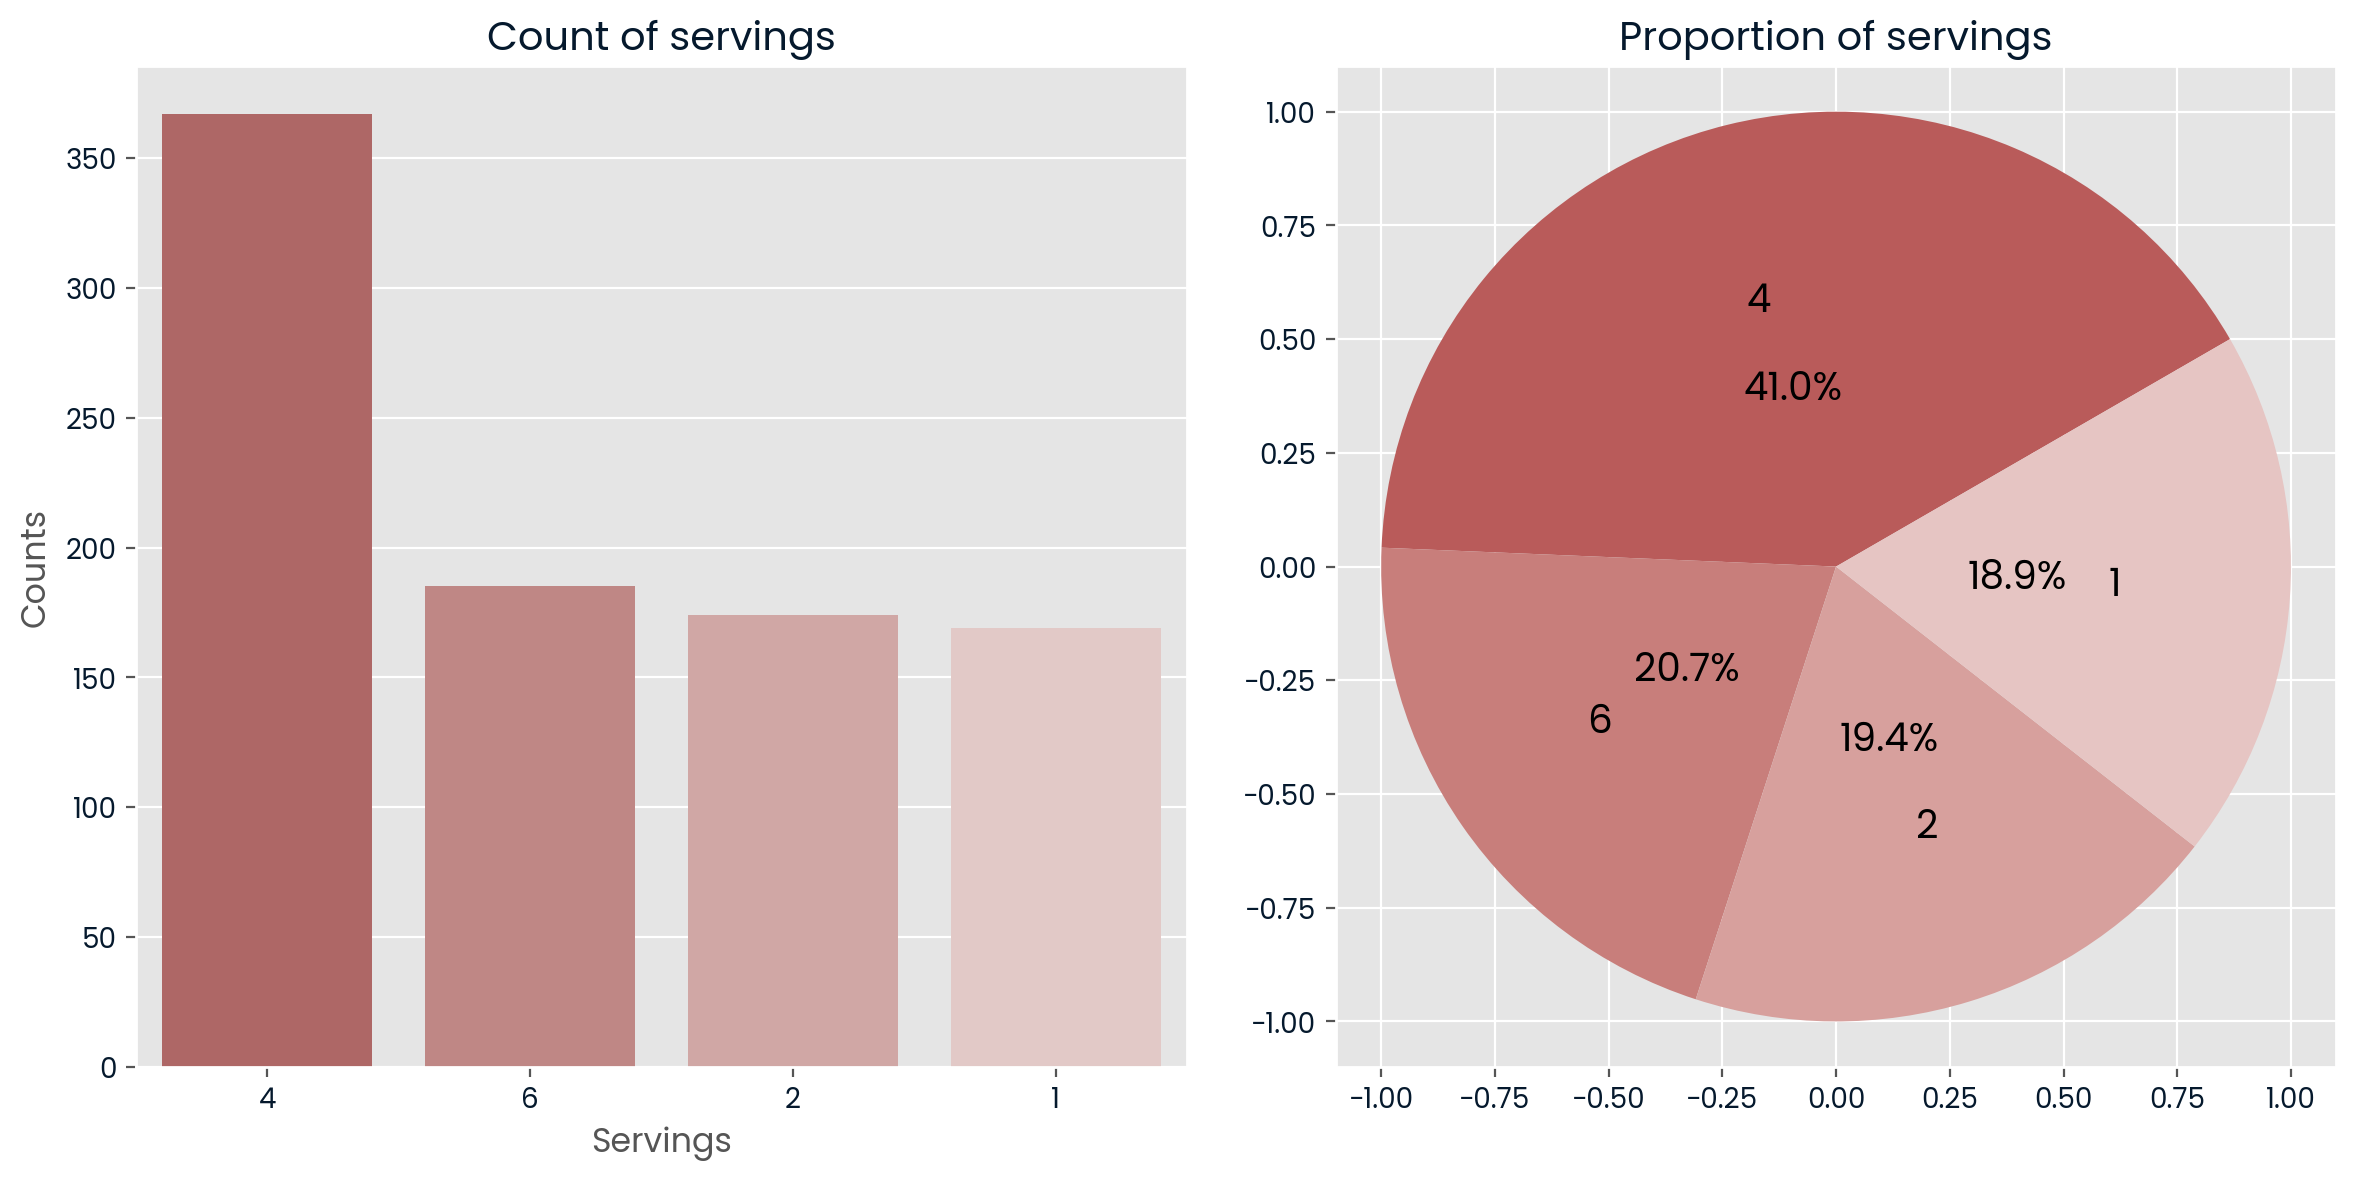

In [ ]:
# Subset category column and labels
servings = recipe_site_traffic["servings"].value_counts()
labels = servings.index

# Create a color palette
palette = sns.color_palette("vlag_r", 10)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Barplot of category counts
sns.barplot(servings, palette=palette, ci=None, order=labels, ax=axes[0])
axes[0].set_title("Count of servings")
axes[0].set_xlabel("Servings")
axes[0].set_ylabel("Counts")

# Pie chart of servings proportions
plt.pie(
    servings,
    frame=True,
    labels=labels,
    colors=palette,
    textprops={"fontsize": 14, "color": "black", "weight": "regular"},
    autopct="%1.1f%%",
    startangle=30,
    pctdistance=0.4,
    labeldistance=0.6,
)
plt.title("Proportion of servings")
plt.tight_layout()

### Observation: Relationships between variables
- The pairplot doesn't reveal any strong correlations between the numerical features.
- It does, however, show that most of the features have a skewed distribution, which suggests outliers.

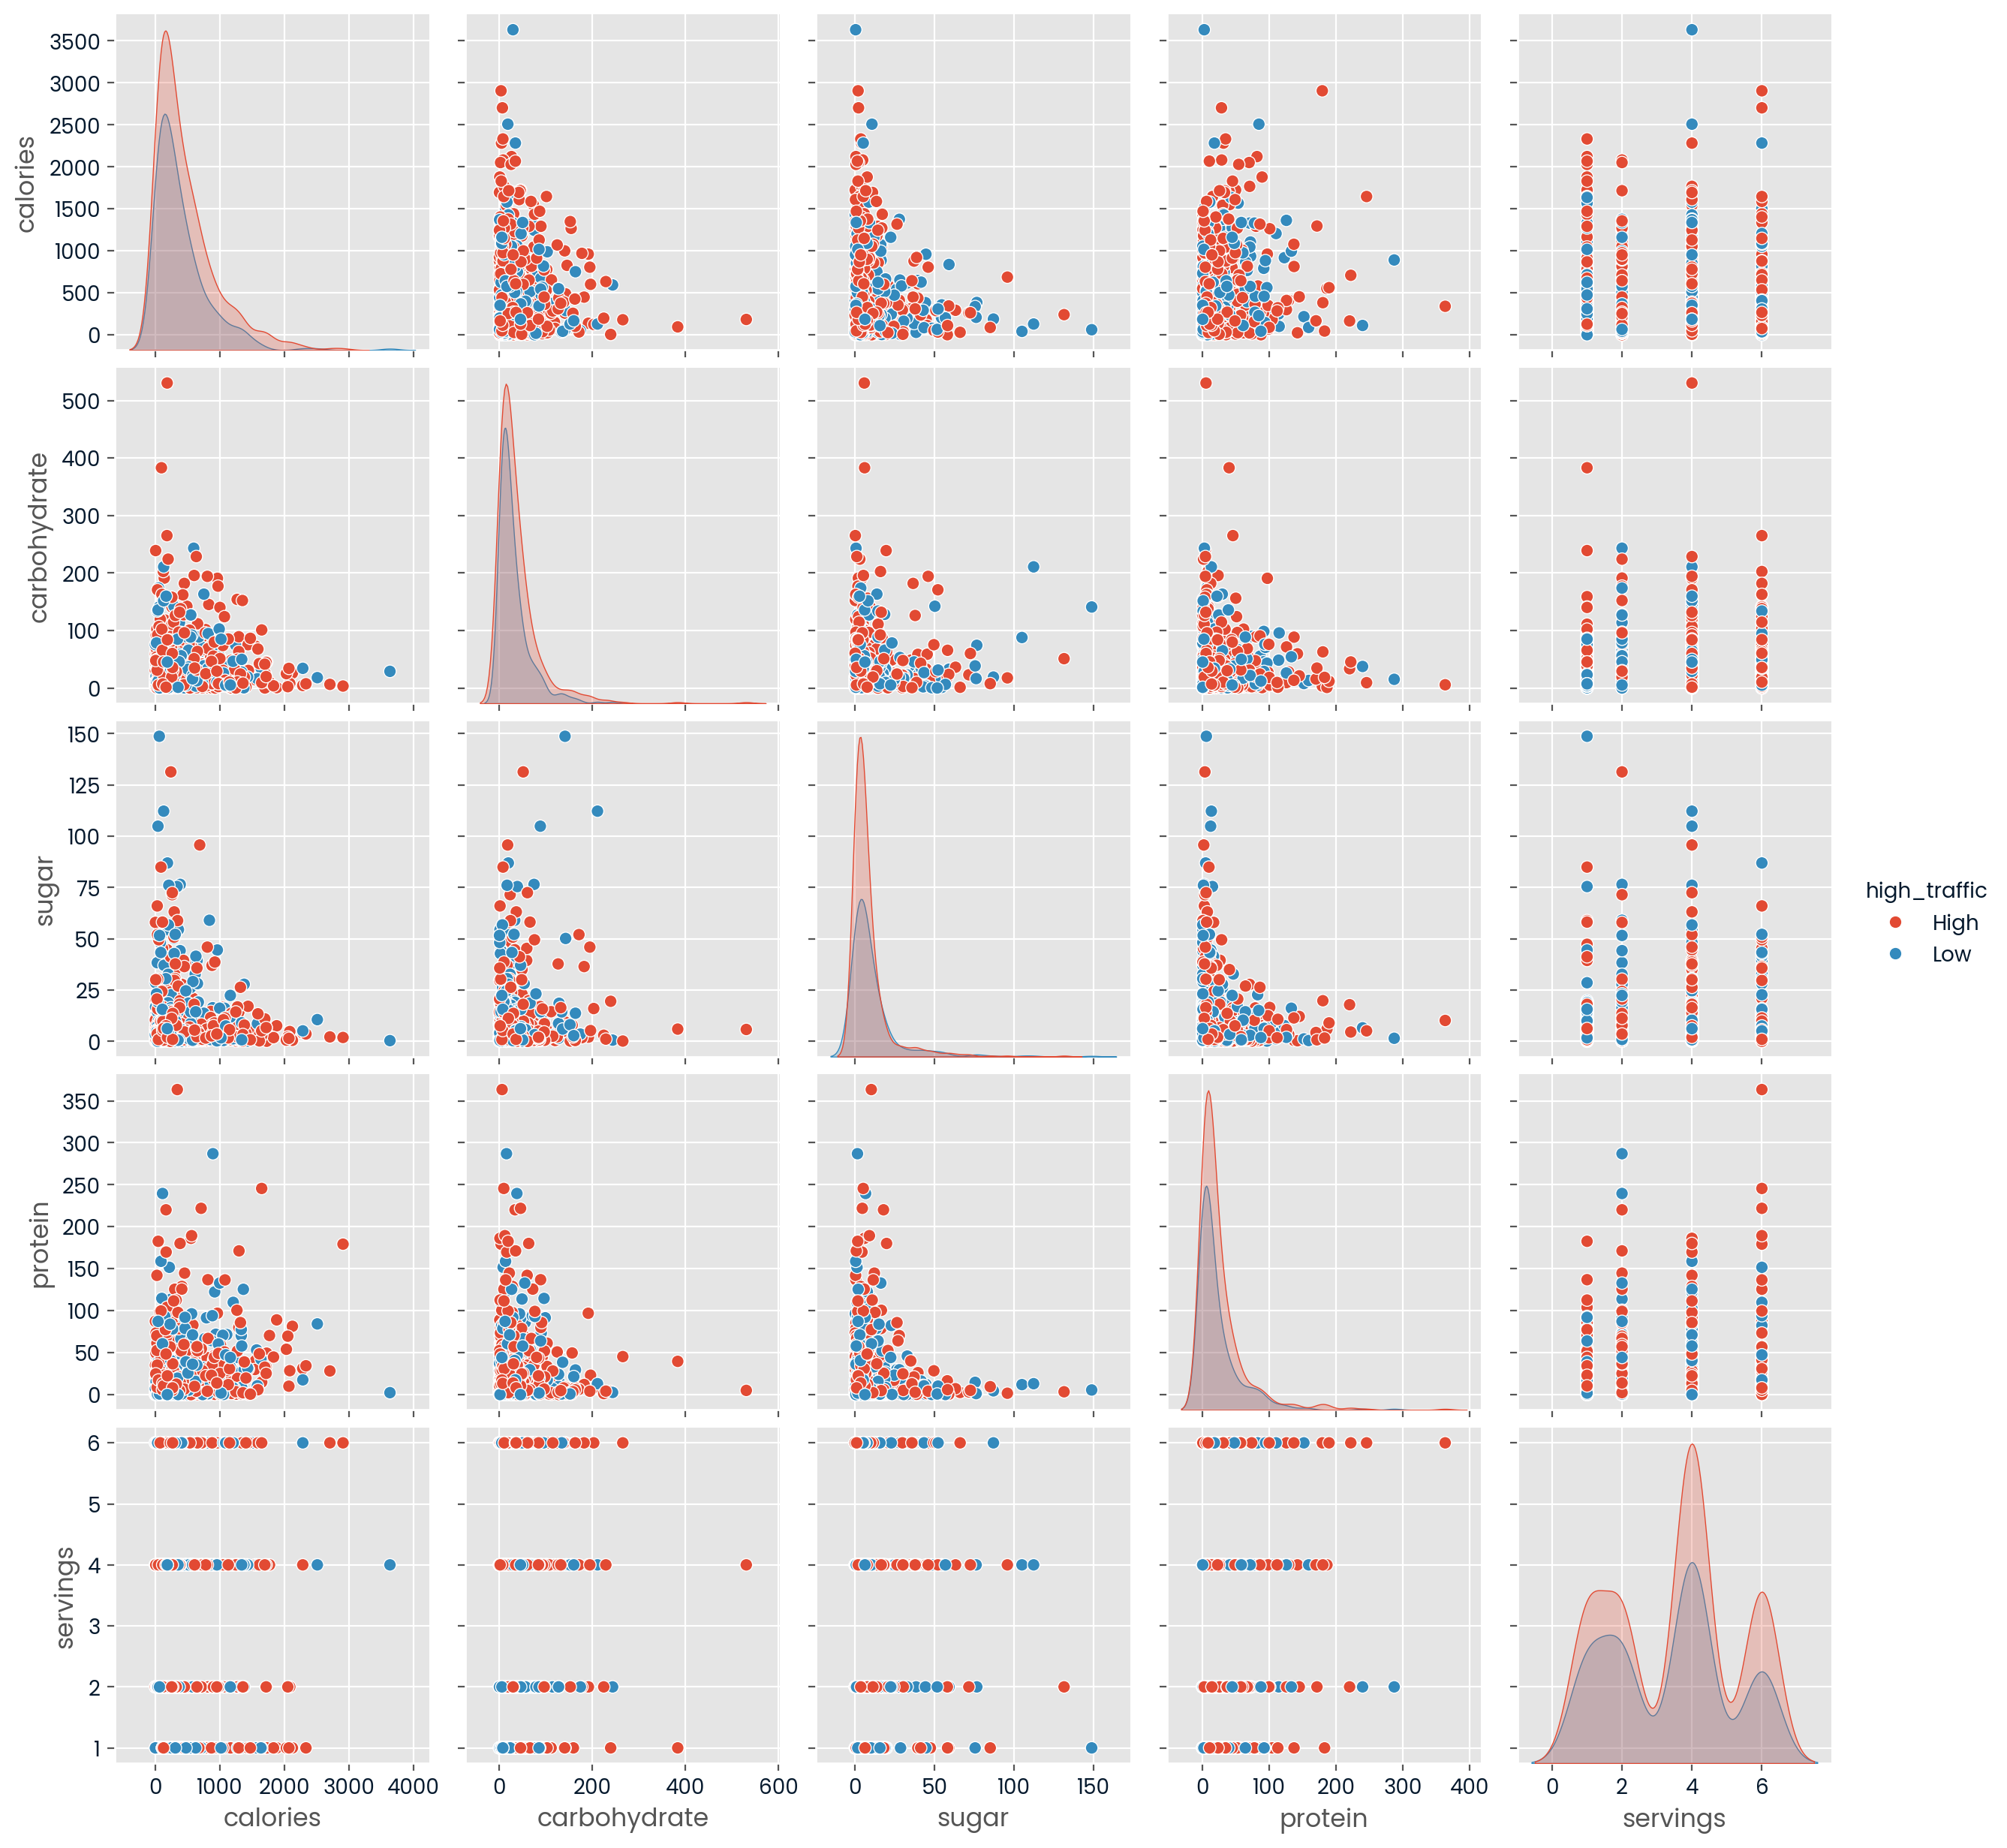

In [ ]:
sns.pairplot(recipe_site_traffic.drop("recipe", 1), hue="high_traffic")
plt.show()

The heatmap below reveals no strong correlations between numerical features.

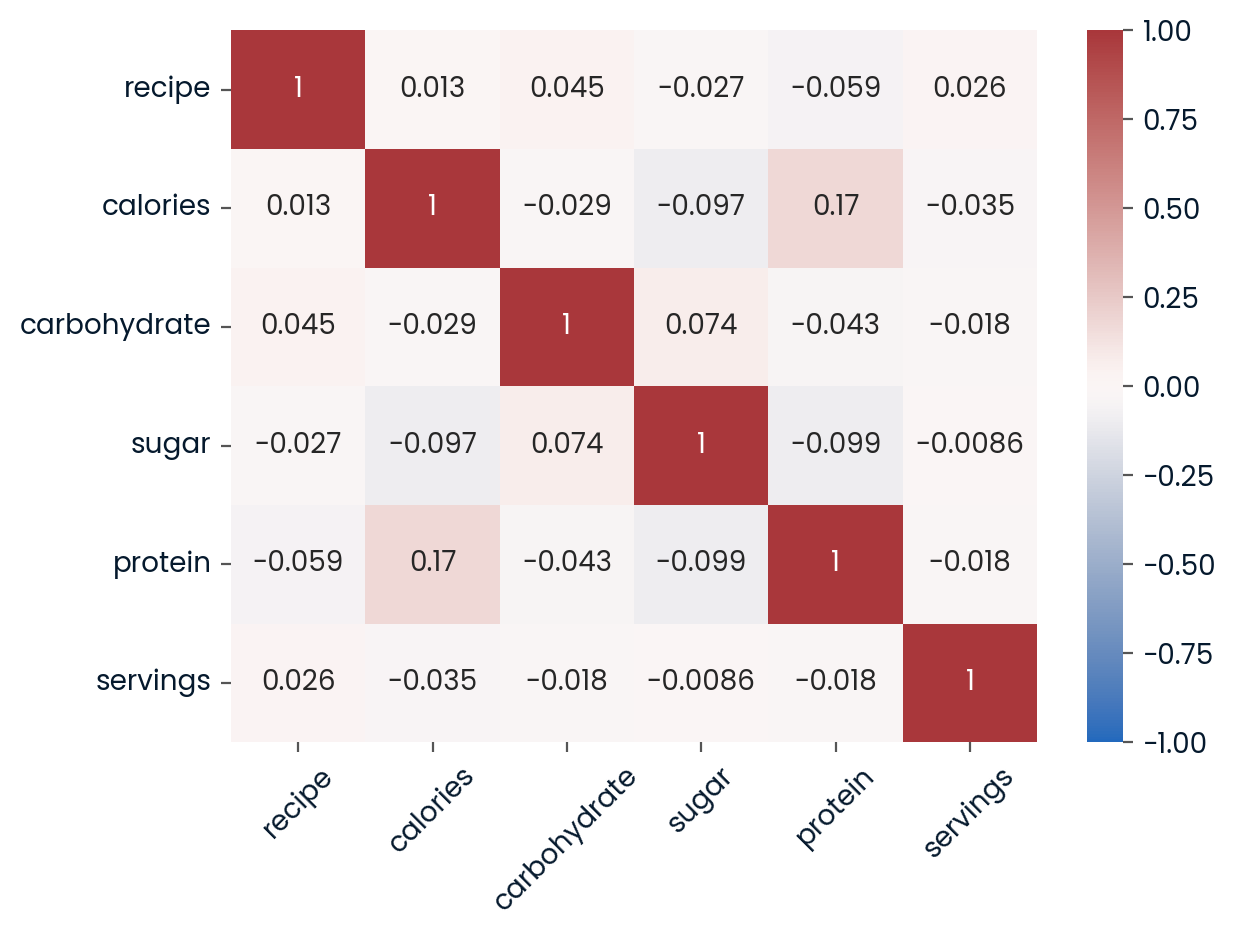

In [ ]:
# Heatmap plot for correlation between columns
sns.heatmap(recipe_site_traffic.corr(), annot=True, cmap="vlag", vmin=-1, vmax=1)
plt.xticks(rotation=45)
plt.tight_layout()

### Distribution of nutritional components (continuous variables)
The evident right-skewness in the distributions of nutritional columns, suggests the presence of outliers.

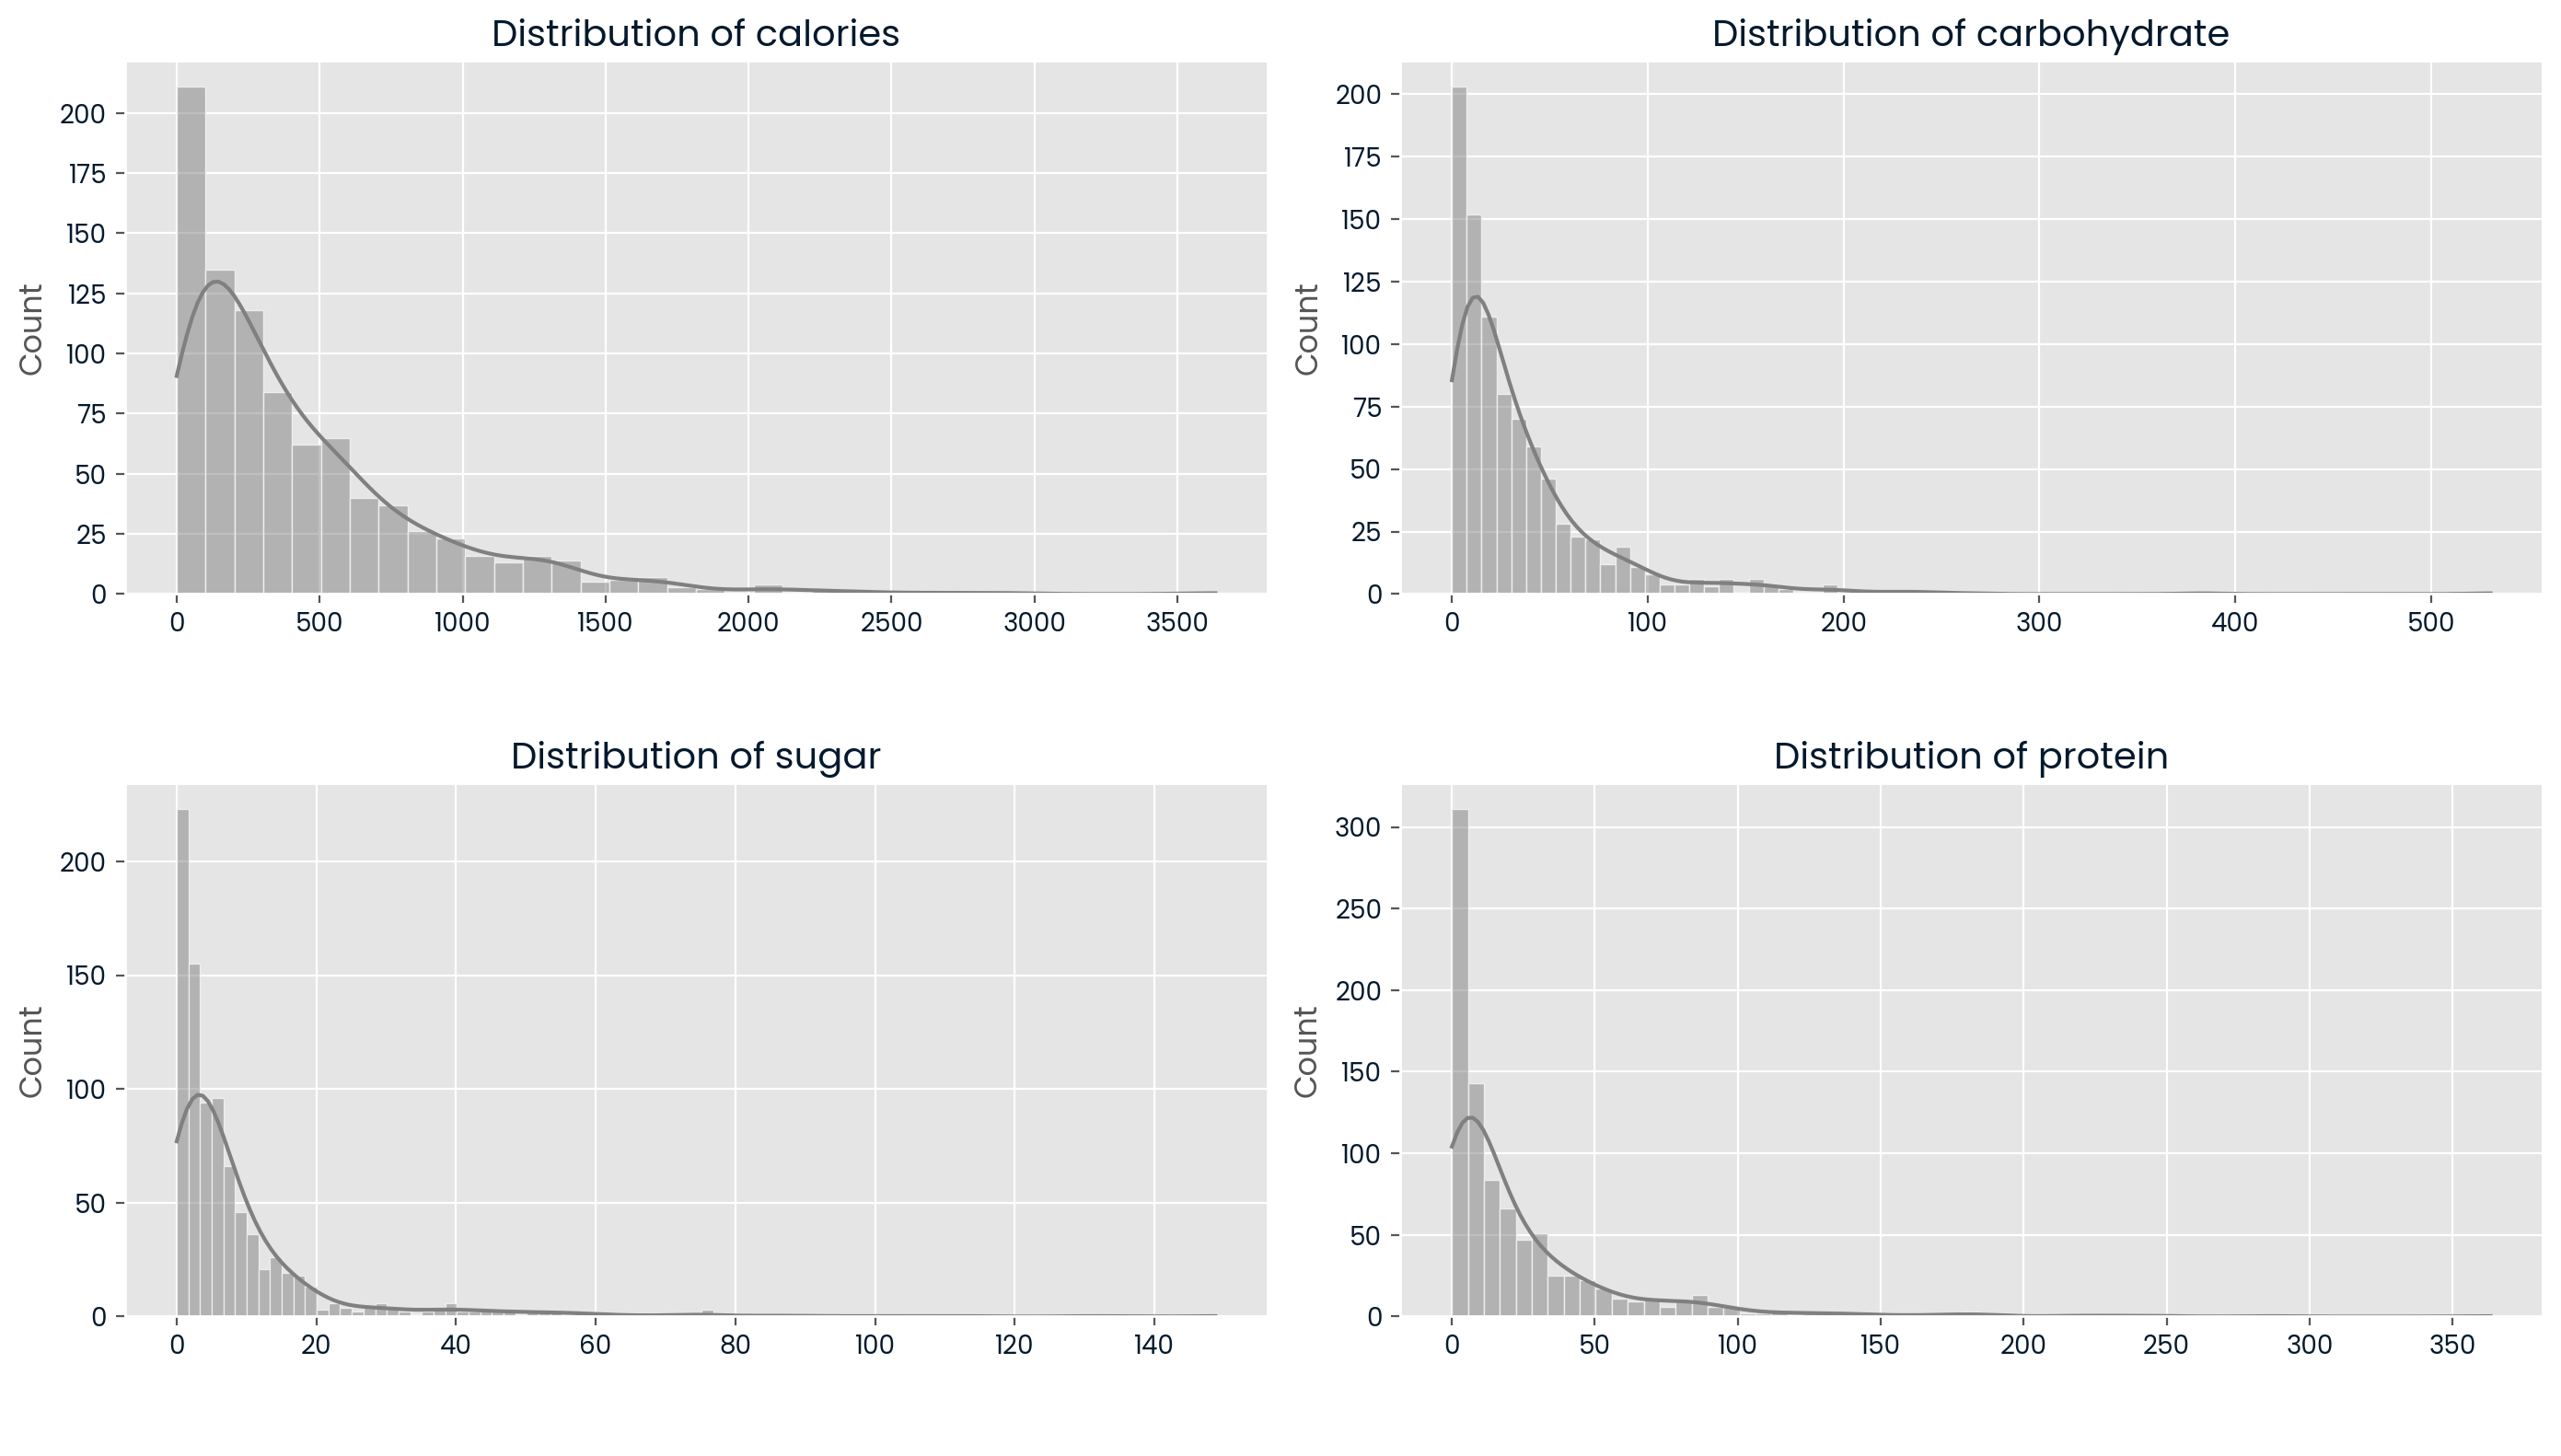

In [ ]:
# Select nutritional components
nutrition_cols = recipe_site_traffic.select_dtypes(include=["float"]).columns

# Plot the distribution of each nutritional components
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Iterates over and plot nutritional columns in transformed dataset
for i, column in enumerate(nutrition_cols):
    row = i // 2
    col = i % 2
    sns.histplot(
        data=recipe_site_traffic, x=column, kde=True, color="gray", ax=axes[row, col]
    ).set_title(f"Distribution of {column}")
    axes[row, col].set_xlabel(" \n")
    plt.tight_layout()

### Detecting outliers in Nutritional components (continuous variables)
- The boxen plots confirm the presence of outliers in the nutritional fields.
- Given the non-normal nature of these distributions, I will utilize the median as the point estimate for subsequent analysis.

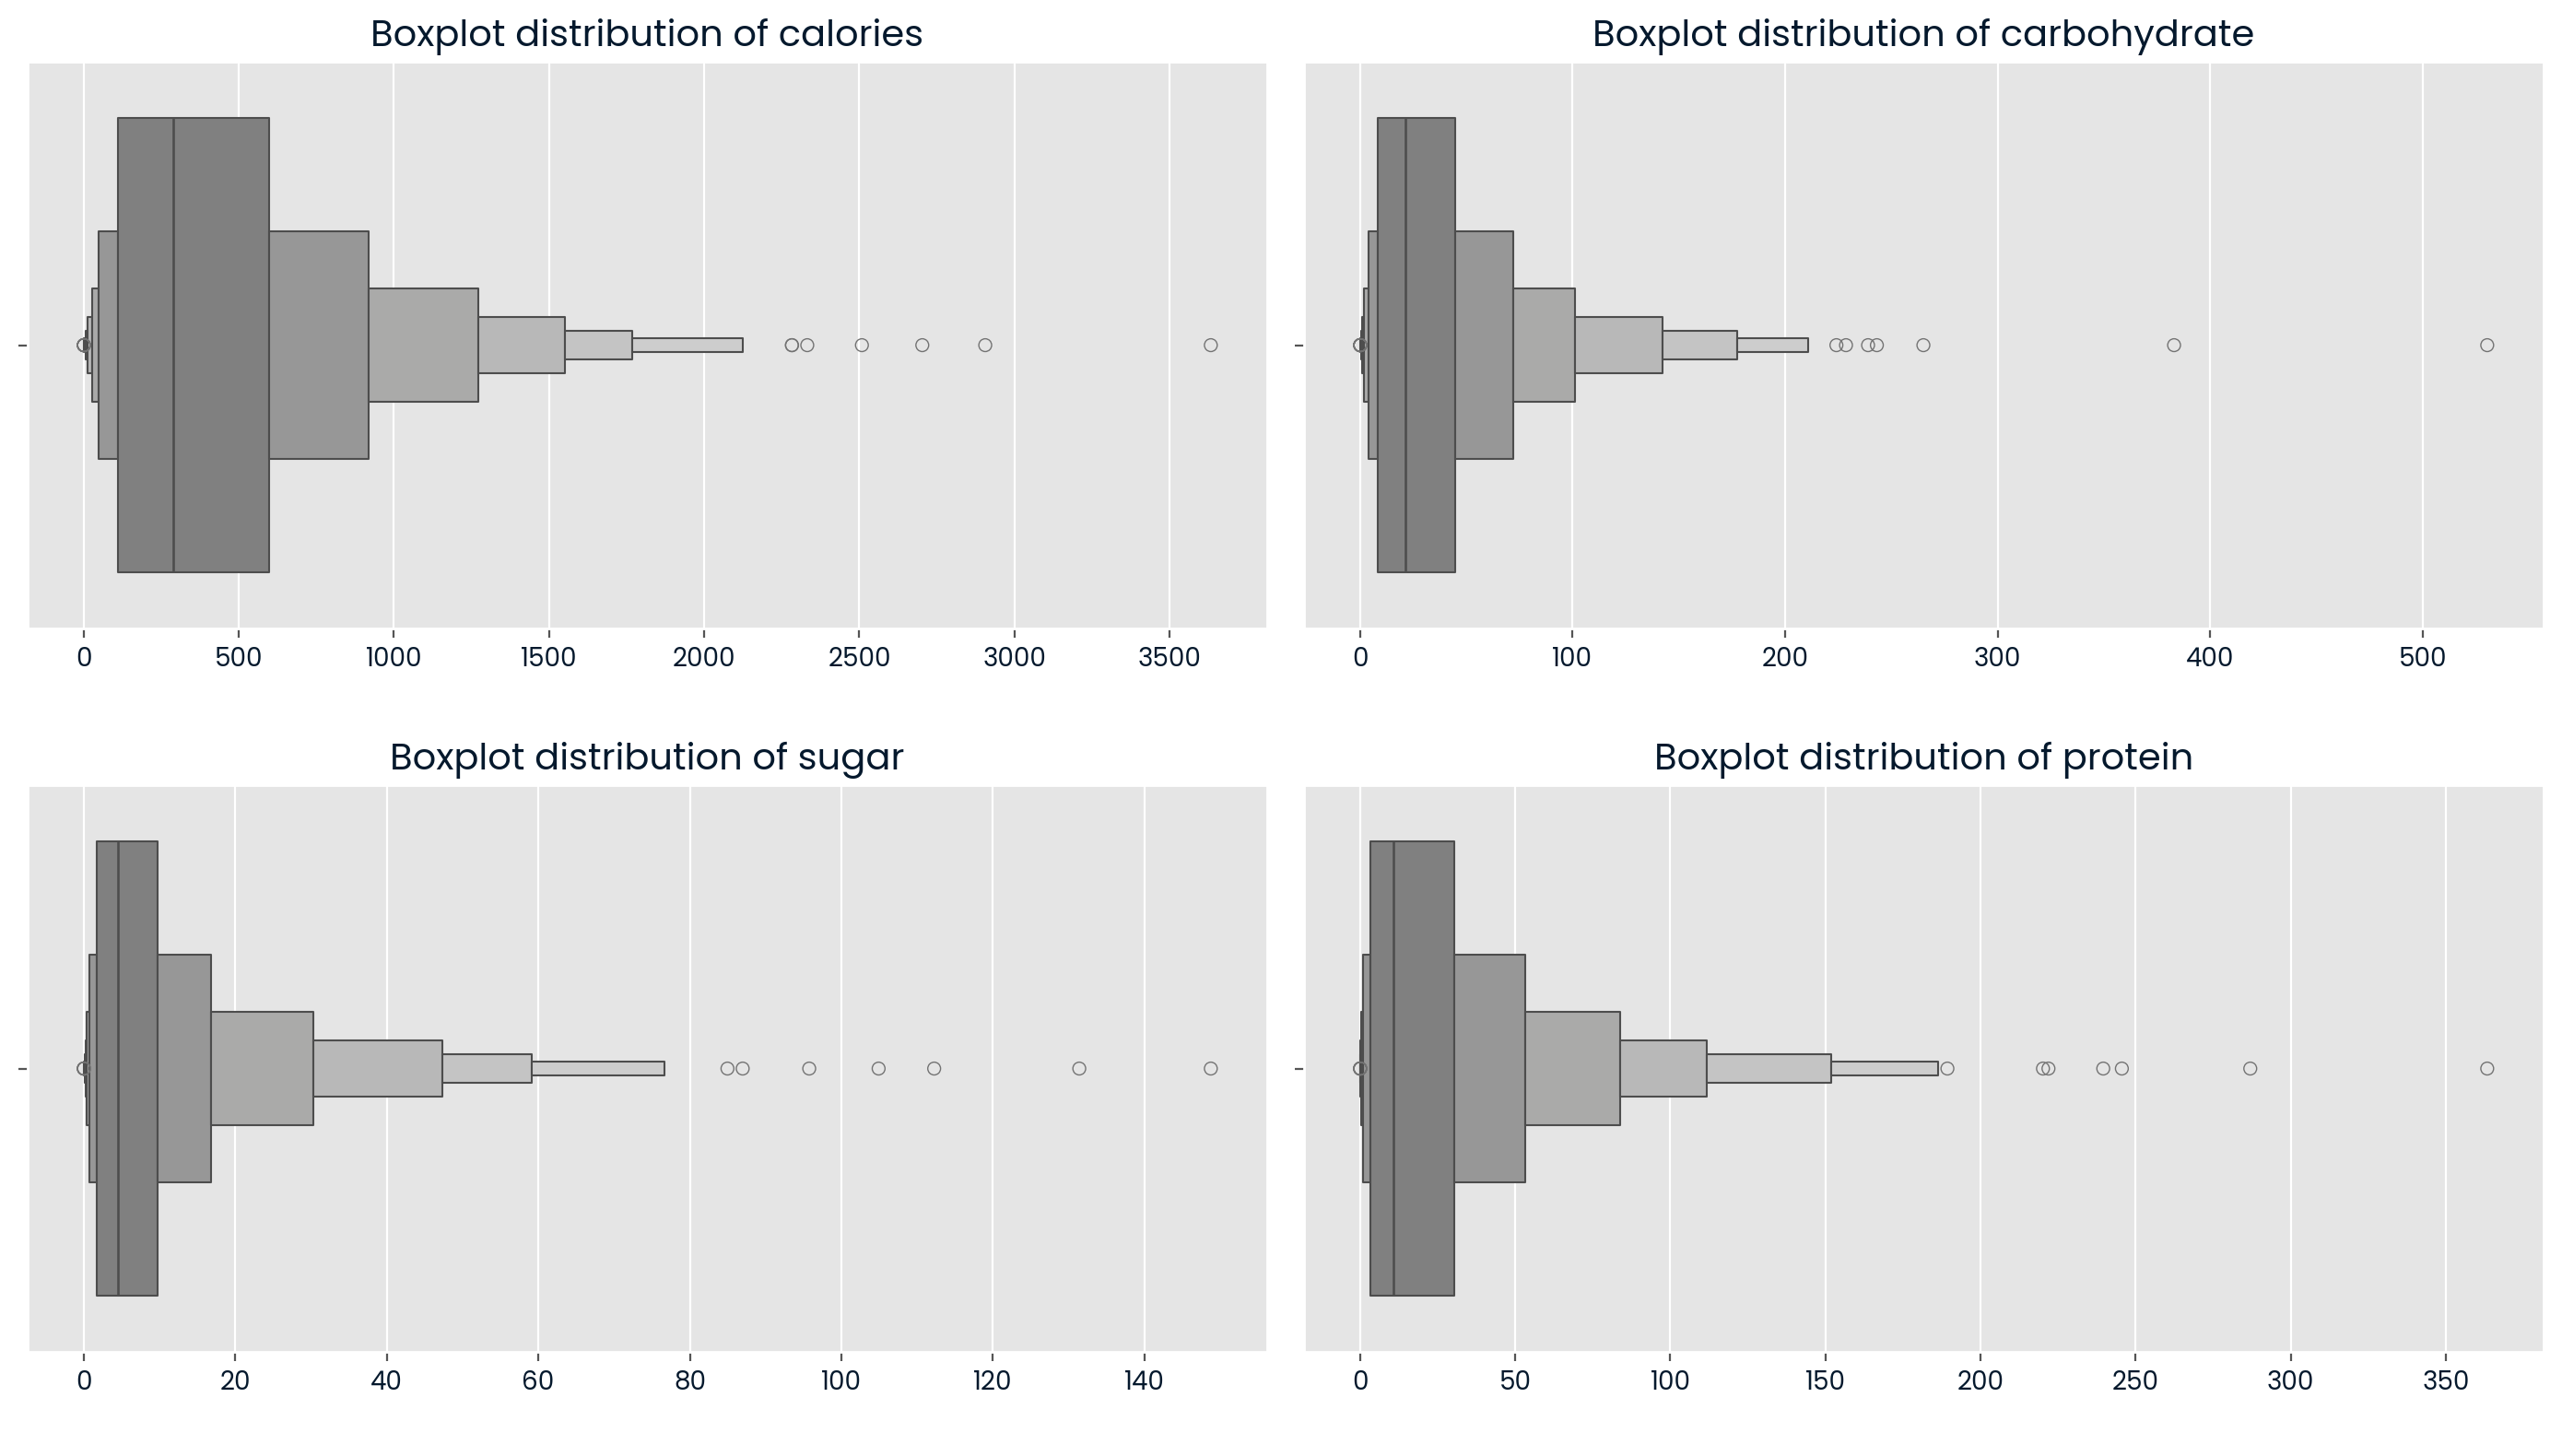

In [ ]:
# Boxen plot of distributions for nutritional components
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Iterates over nutritional columns in dataset
for i, column in enumerate(nutrition_cols):
    row = i // 2
    col = i % 2
    sns.boxenplot(
        data=recipe_site_traffic, x=column, color="gray", ax=axes[row, col]
    ).set_title(f"Boxplot distribution of {column}")
    axes[row, col].set_xlabel(" ")
    plt.tight_layout()

### Observation: Median of nutritional components by Category
- I examined the median values of nutritional components across various recipe categories.
- The visualizations reveal no significant trends in the median nutritional values across the categories. These values vary based on the type of food or beverage.

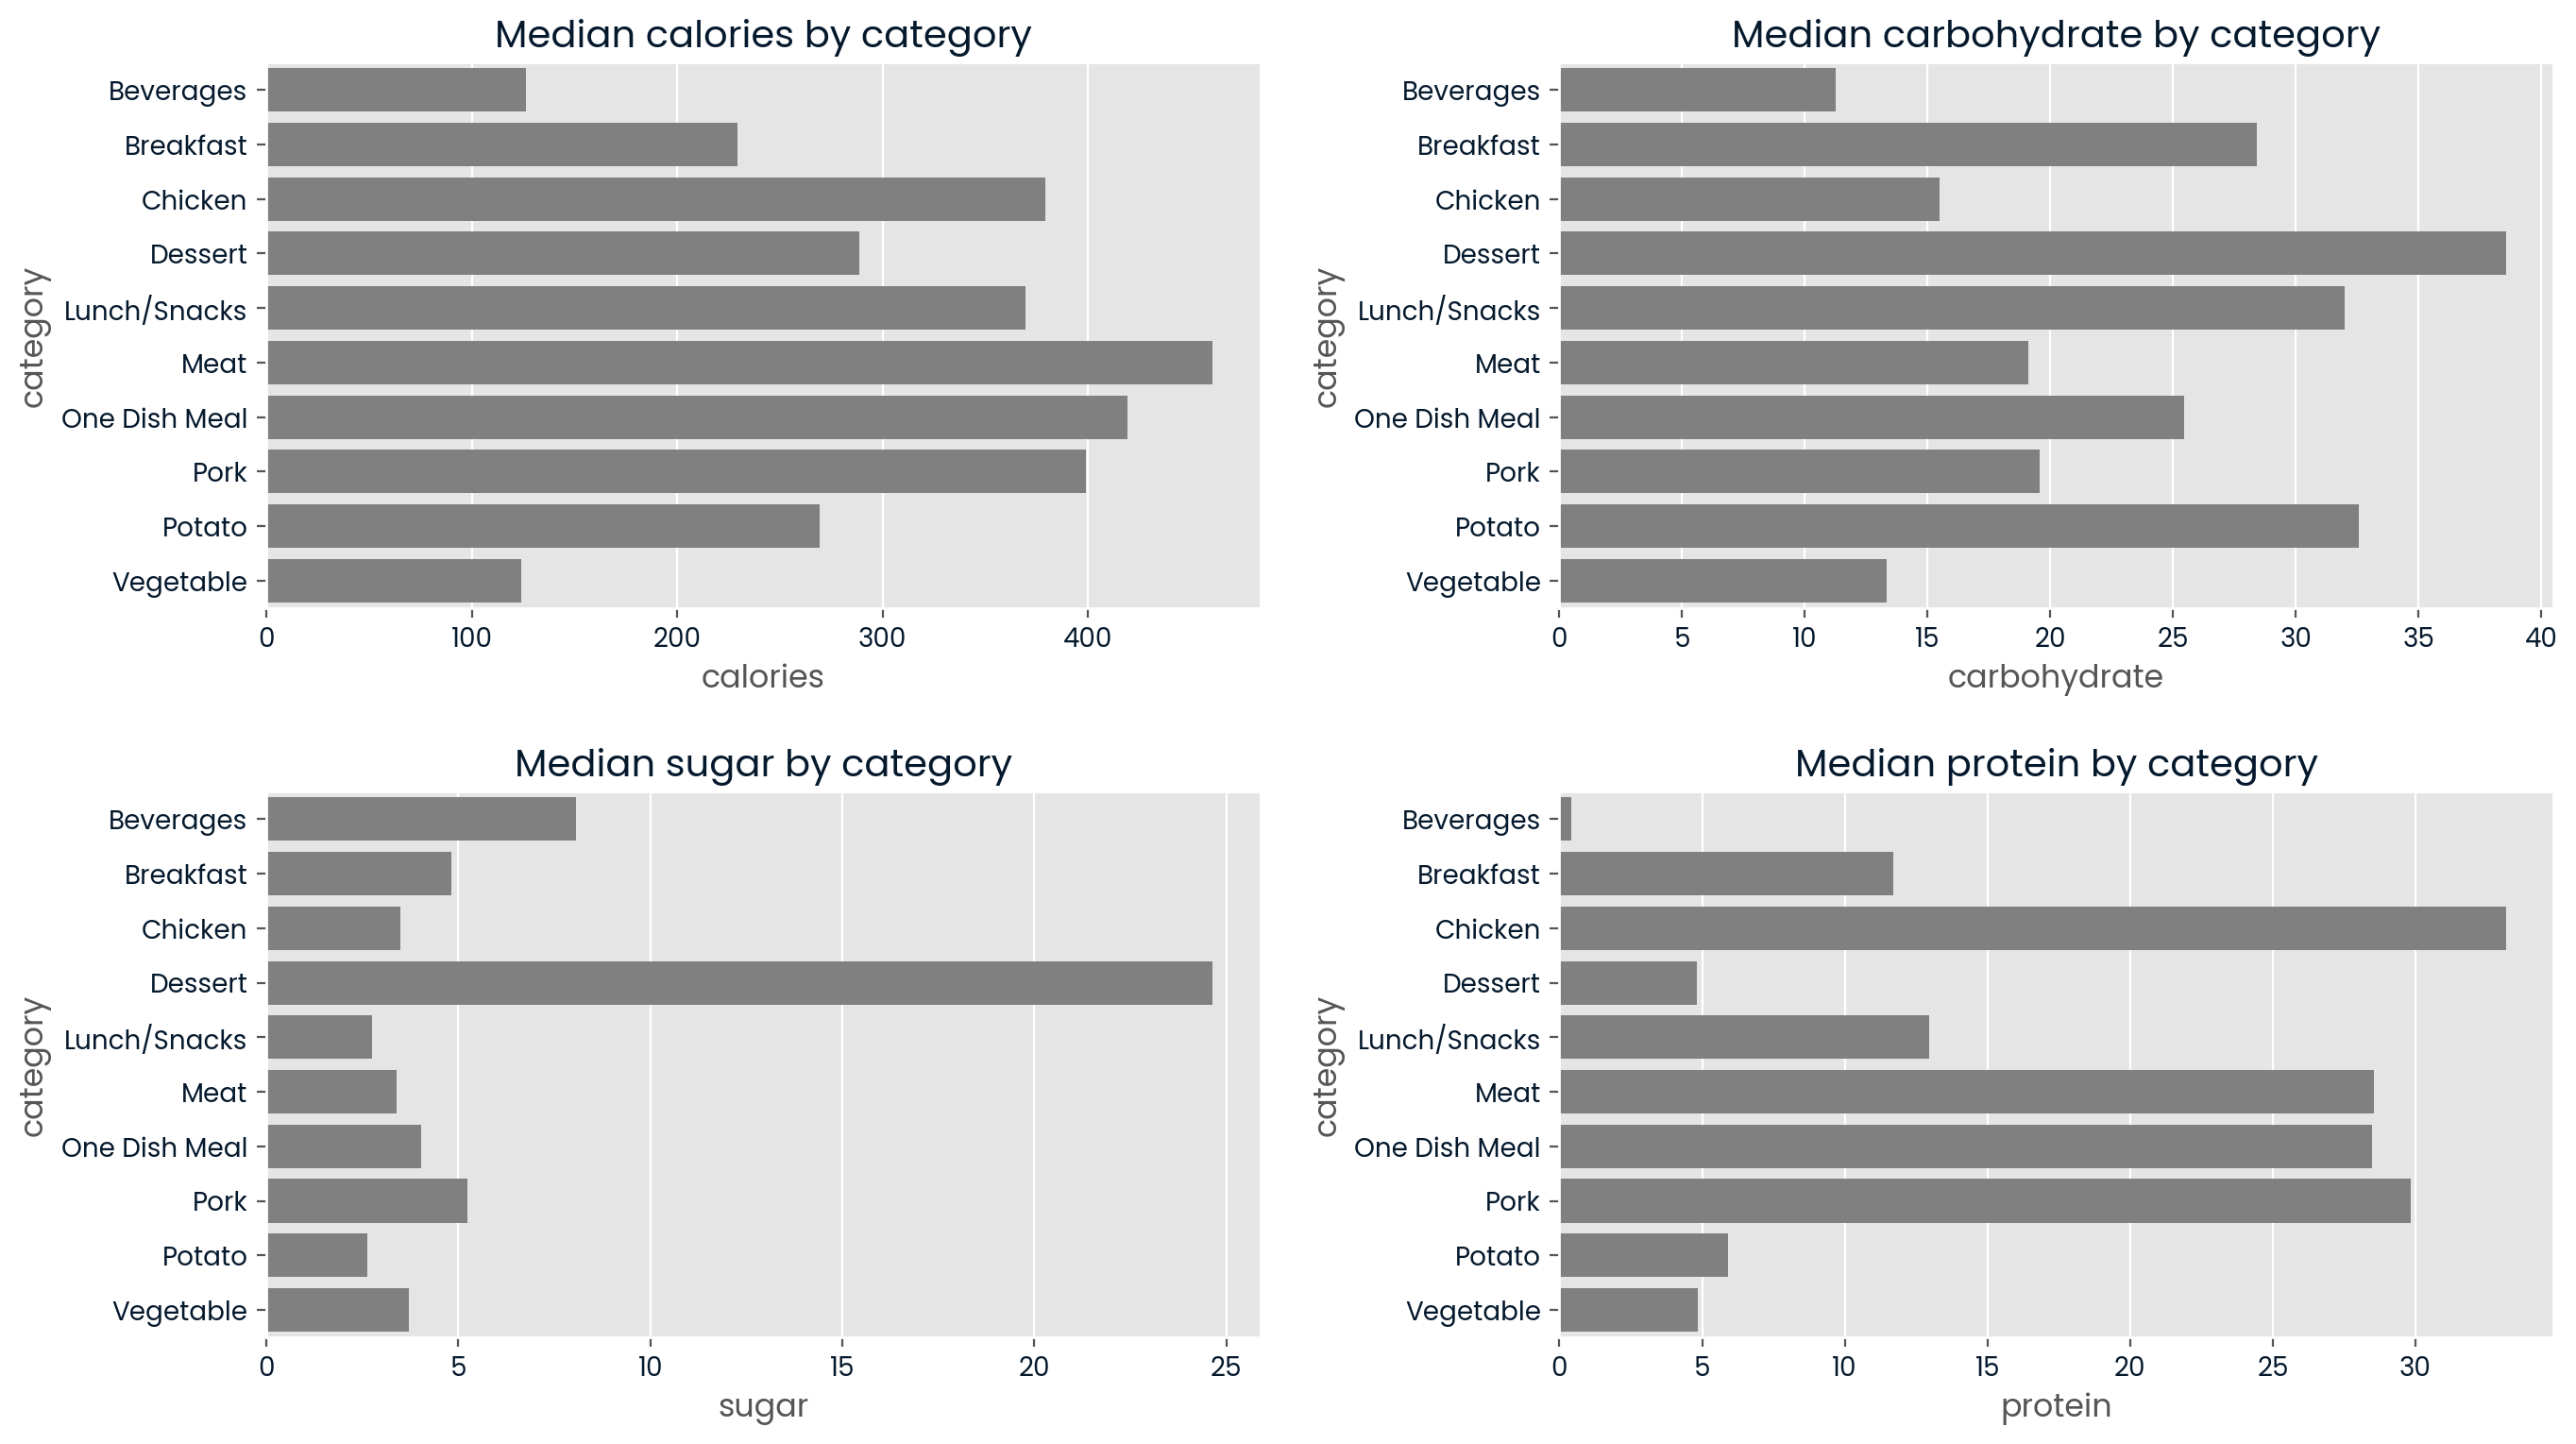

In [ ]:
# Groupby "category" using median of nutritional components
category_nutrients = pd.pivot_table(
    recipe_site_traffic, index="category", values=nutrition_cols, aggfunc="median"
)

fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Iterate over and plot nutritional components
for i, column in enumerate(nutrition_cols):
    row = i // 2
    col = i % 2
    sns.barplot(
        data=category_nutrients, x=column, y="category", color="gray", ax=axes[row, col]
    ).set_title(f"Median {column} by category")

plt.tight_layout(pad=2)

### Observation: High-traffic by Servings
My analysis indicates a correlation between recipes designed for **6 servings** and increased website traffic **63.78%**, and **2 servings** recording the lowest **56.32%**.

In [ ]:
# Compare rate(%) of each combination of 'servings' and 'high_traffic'
rate_serving_traffic = (
    recipe_site_traffic.groupby("servings")["high_traffic"]
    .value_counts(normalize=True)
    .unstack()
    .round(4)
)
print(rate_serving_traffic)

high_traffic    High     Low
servings                    
1             0.5858  0.4142
2             0.5632  0.4368
4             0.5995  0.4005
6             0.6378  0.3622


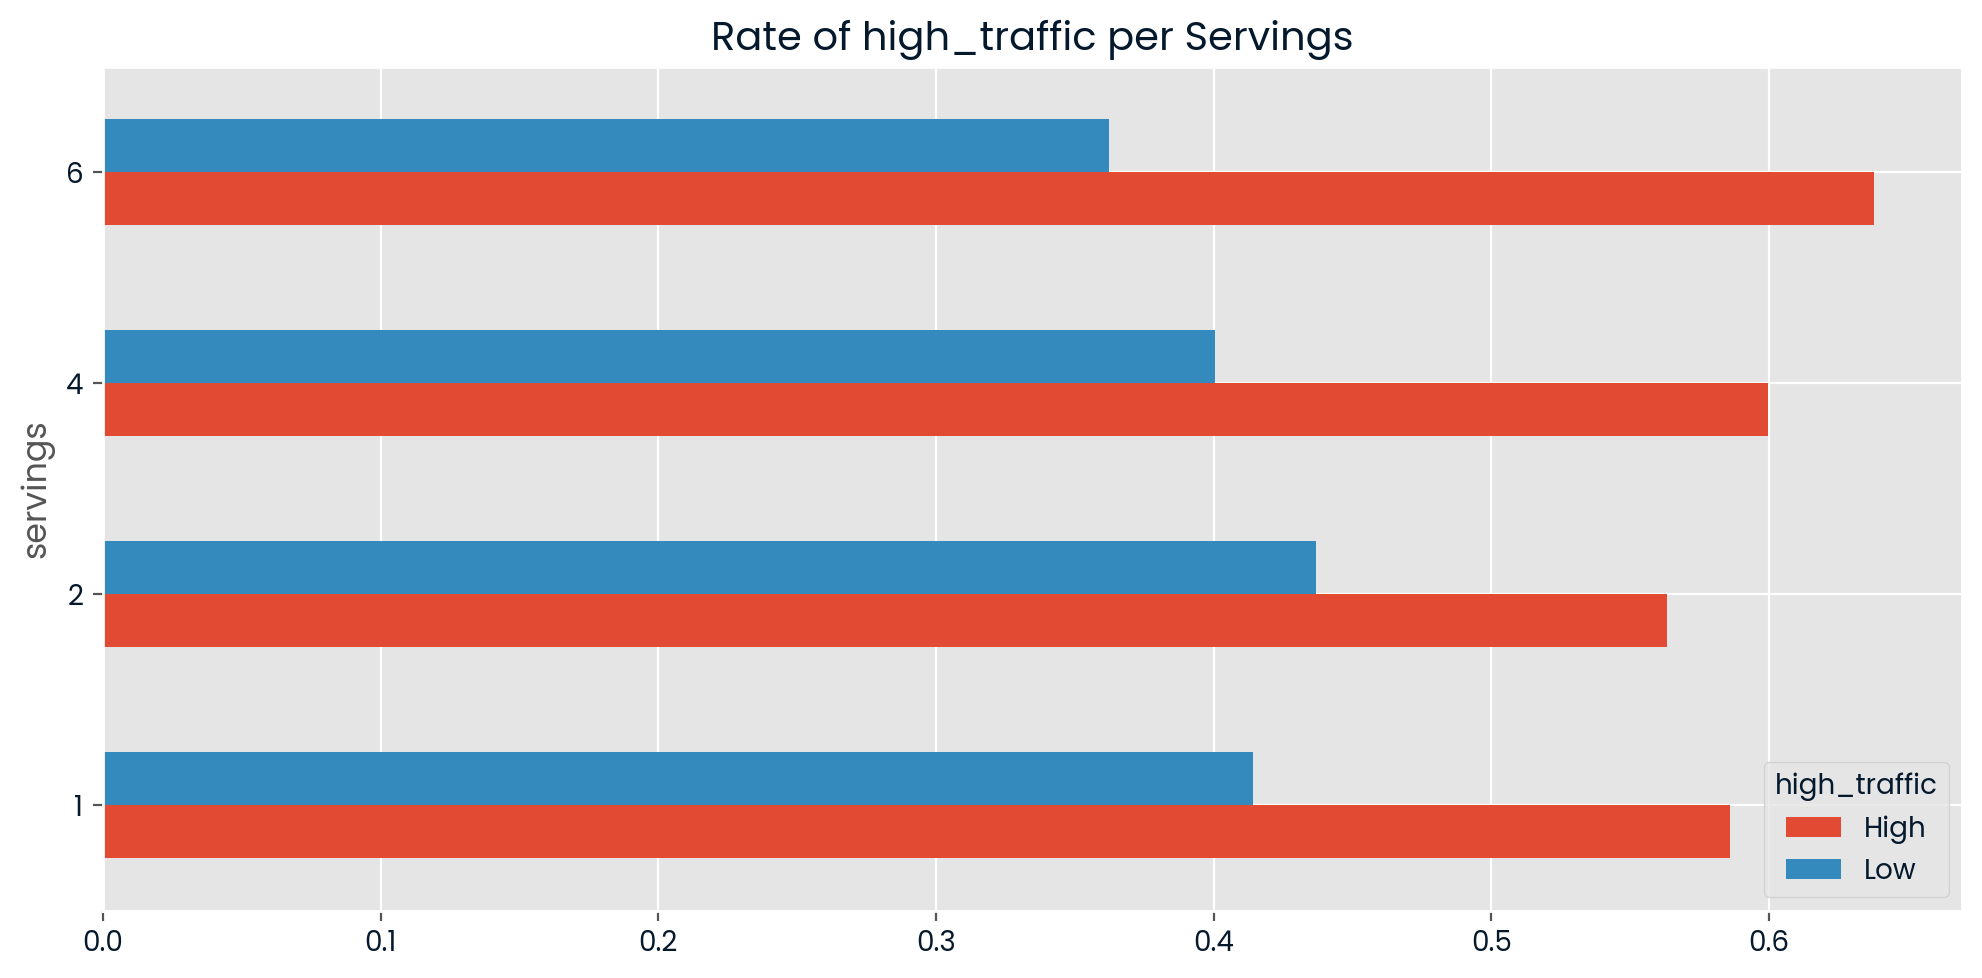

In [ ]:
# Plot 'servings' by 'traffic'
rate_serving_traffic.plot(kind="barh", figsize=(10, 5))
plt.title("Rate of high_traffic per Servings")
plt.tight_layout()

### Observation: High-traffic by Category
According to the analysis, featuring recipes in specific categories significantly boosts website traffic.
- The categories that attract most visitors are **Vegetable** - 98.7%, **Potato** - 94.0%, and **Pork** - 90.4%
- In contrast, the **Beverages** category draws the least rate at 5.4%.

In [ ]:
# Rate of high_traffic by category
count_category_traffic = (
    recipe_site_traffic.groupby("category")["high_traffic"]
    .value_counts(normalize=True)
    .unstack()
)
print(count_category_traffic)

high_traffic       High       Low
category                         
Beverages      0.054348  0.945652
Breakfast      0.311321  0.688679
Chicken        0.423313  0.576687
Dessert        0.623377  0.376623
Lunch/Snacks   0.634146  0.365854
Meat           0.756757  0.243243
One Dish Meal  0.761194  0.238806
Pork           0.904110  0.095890
Potato         0.939759  0.060241
Vegetable      0.987179  0.012821


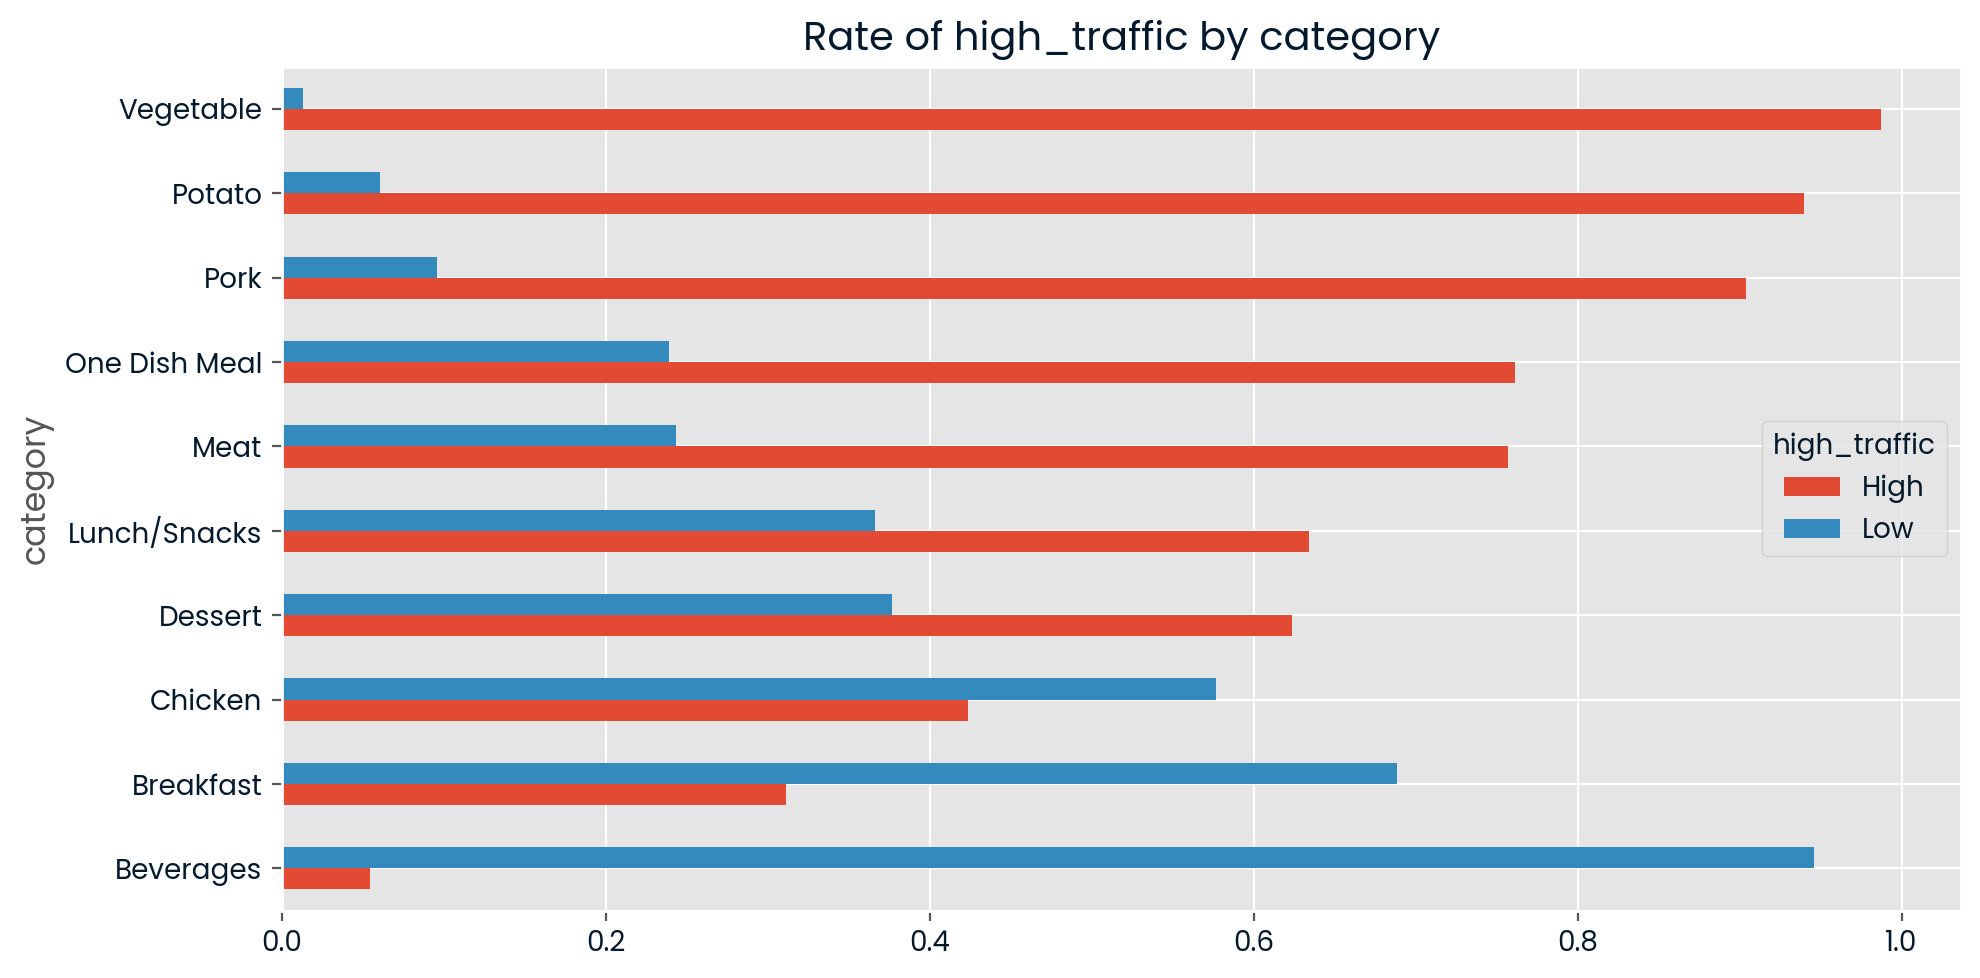

In [ ]:
# Plot 'servings' by 'traffic'
count_category_traffic.plot(kind="barh", figsize=(10, 5))
plt.title("Rate of high_traffic by category")
plt.tight_layout()

### Observation: Target variable margins
I reviewed the proportions of the target variables to determine if stratification will be applied during the modeling stage:
- High traffic constitutes 60% and Low traffic 40%.

In [ ]:
# Check proportions of target variable
count = recipe_site_traffic["high_traffic"].value_counts(dropna=False).values[::1]
margin = (
    recipe_site_traffic["high_traffic"]
    .value_counts(normalize=True, dropna=False)
    .values[::1]
)
print(pd.DataFrame({"traffic": ["High", "Low"], "count": count, "margin": margin}))

  traffic  count    margin
0    High    535  0.597765
1     Low    360  0.402235


## 03. Model Development ✅
Given that the target variable, **high_traffic** is binary (High or Low), I'll employ binary classification algorithms from supervised machine learning to address this prediction task.

The modeling steps include:
- **Encoding:** Categorical features (**high_traffic**, **category**) were encoded using pandas.get_dummies().
- **Split data:** Dataset was split into 80% training and 20% testing, with stratification.
- **Standardization:** Scaled numerical features using the PowerTransformer with the "yeo-johnson" method to effectively handle 0 and negative values.
- **Model fitting:** 1 baseline model and 2 comparison models
    - Logistic Regression as an ideal baseline model for binary classification tasks.
    - KNeighborsClassifier as comparison model for it's popularity and robustness.
    - Decision Tree as camparison model, very robust against outliers and easy to interpret.
- **Model Evaluation:** Performances of models were evaluated on train and test sets using metrics such as accuracy & precision.

### Dataframe with Encoded Variables

In [ ]:
"""- ENCODING -"""
# Make a copy of dataframe
recipe_data = recipe_site_traffic.copy()

# Encode "high_traffic" values, where High = 1, Low = 0
recipe_data["high_traffic"] = np.where(recipe_data["high_traffic"] == "High", 1, 0)

# Encode "category" with pandas.get_dummies
category_dummies = pd.get_dummies(recipe_data["category"])

# Concat category_dummies to main recipe_data
transformed_df = pd.concat([recipe_data, category_dummies], axis=1)

# Drop 'category' & 'recipe' columns, we don't need them in splitting
transformed_df.drop(["recipe", "category"], axis=1, inplace=True)

# Display head of transformed dataset
transformed_df.head()

calories  carbohydrate  sugar  ...  Pork  Potato  Vegetable
1     35.48         38.56   0.66  ...     0       1          0
2    914.28         42.68   3.09  ...     0       0          0
3     97.03         30.56  38.63  ...     0       0          0
4     27.05          1.85   0.80  ...     0       0          0
5    691.15          3.46   1.65  ...     0       0          0

[5 rows x 16 columns]

In [ ]:
"""- SPLIT DATA -"""
# Set random seed
SEED = 5

# Define features(X) and target(y)
X = transformed_df.drop(["high_traffic"], axis=1)
y = transformed_df["high_traffic"]

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, train_size=0.8, random_state=SEED
)
"""- TRANSFORM DATA -"""
# Instantiate the PowerTransformer with default method: "yeo-johnson"
scaler = PowerTransformer()

# Apply scaler on X_train
X_train_scaled = scaler.fit_transform(X_train)

# Apply scaler on X_test
X_test_scaled = scaler.transform(X_test)

"""- MODEL FITTING -"""
# Instantiate baseline and comparison models
lr = LogisticRegression(random_state=SEED)
dt = DecisionTreeClassifier(random_state=SEED)
knn = KNeighborsClassifier()

# Fit models with train and test sets into name: model dictionary
models = {
    "Logistic Regression": lr.fit(X_train_scaled, y_train),
    "KNN": knn.fit(X_train_scaled, y_train),
    "Decision Tree": dt.fit(X_train_scaled, y_train),
}

### Normal distribution of nutritional components (continuous variables) after scaling

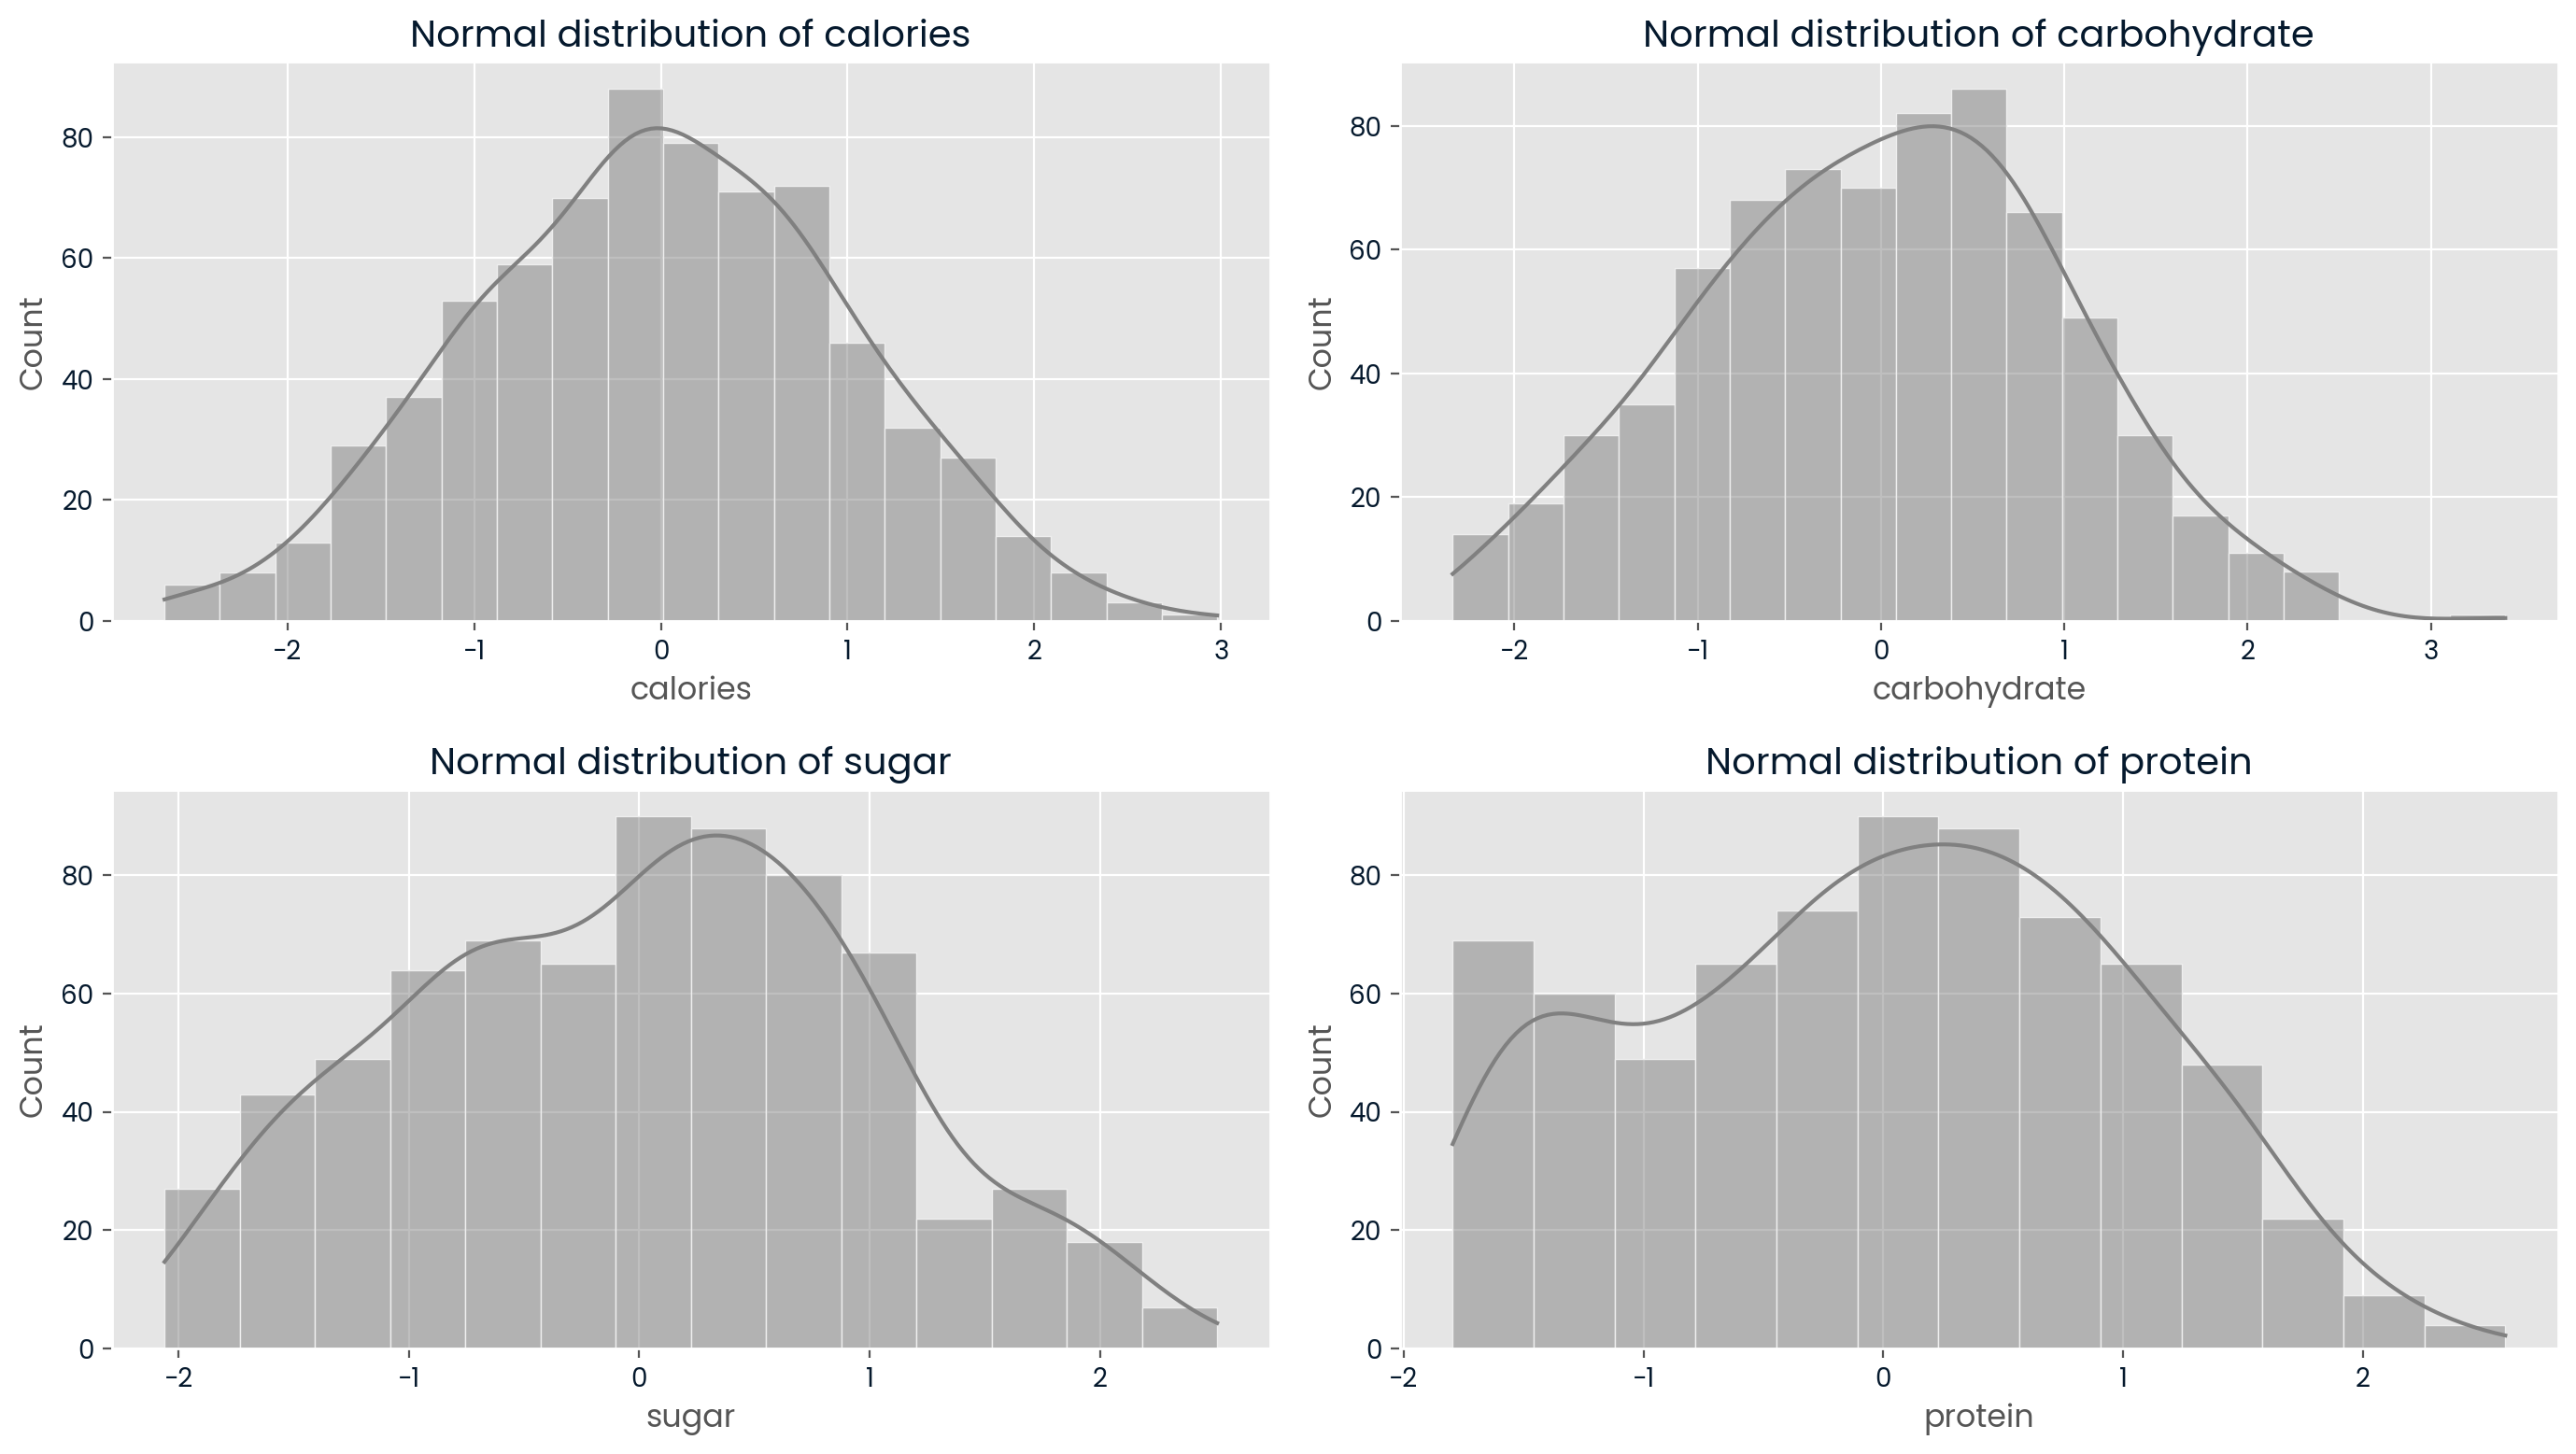

In [ ]:
# Subset continuous variables & create dataframe from X_train_scaled
nutrients_df_scaled = pd.DataFrame(X_train_scaled[:, 0:4], columns=nutrition_cols)

# Extract labels
labels = nutrients_df_scaled.columns

fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Iterates over and plot scaled nutritional variables
for i, column in enumerate(labels):
    row = i // 2
    col = i % 2
    sns.histplot(
        data=nutrients_df_scaled, x=column, kde=True, color="gray", ax=axes[row, col]
    ).set_title(f"Normal distribution of {column}")

    # axes[row, col].set_xlabel(' ')
    plt.tight_layout(pad=1.5)

## 04. Model Evaluation ✅
For the model evaluation, the following steps were taken:
- Compute performances on model accuracy, precision and recall on both training and testing sets.
- Results are organized into a dataframe for easy assessment and comparison.

### Oberservation: Confusion Matrix
Summary results of confusion matrix showing the number of correct and incorrect predictions made by the model.
 - **True positives**: This is the count of instances where the model correctly predicted high traffic (bottom-right)
    - **Logistic Regression** : correctly predicted **92** recipes with high-traffic
    - **KNN** : correctly predicted **86** recipes with high-traffic
    - **Decision Tree** :   correctly predicted **81** recipes with high-traffic

While all models exhibiting different trade-offs in precision, **Logistic Regression** outperforms KNN and Decision Tree.

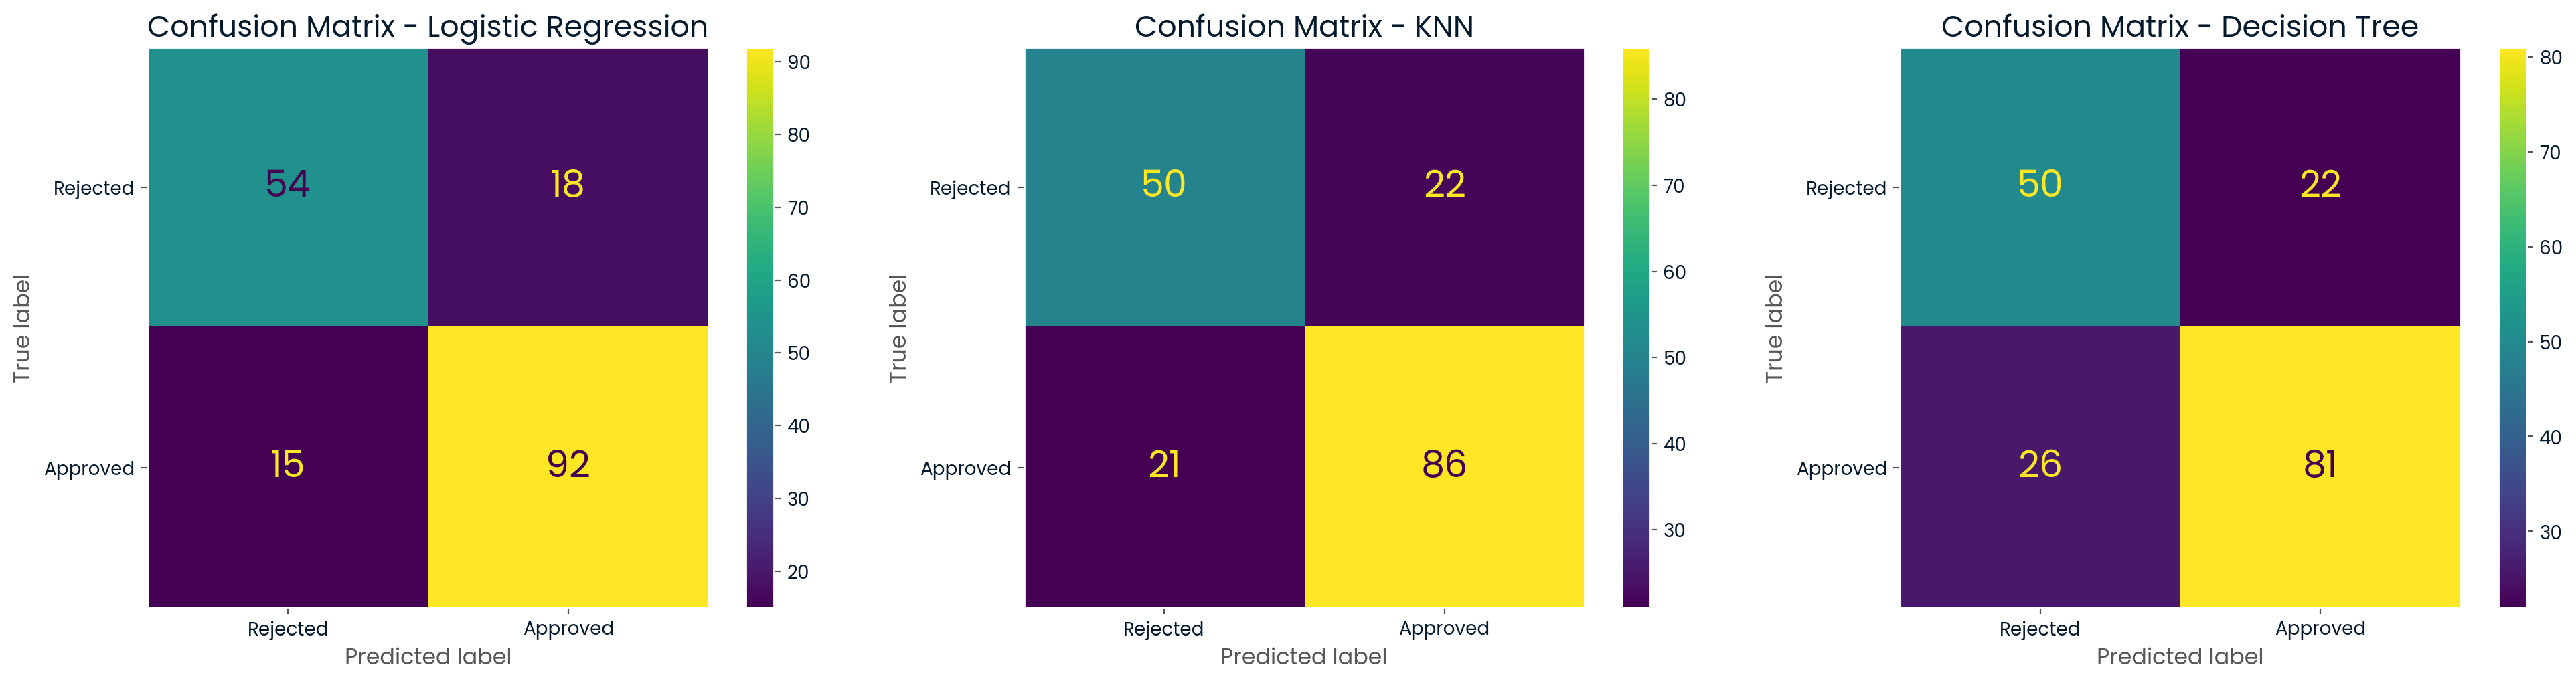

In [ ]:
# Visualizing confusion_matrix for models
fig, axes = plt.subplots(1, len(models.items()), figsize=(20, 5))

for i, [name, model] in enumerate(models.items()):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    display = ConfusionMatrixDisplay(cm, display_labels=["Rejected", "Approved"])
    display.plot(ax=axes[i])
    axes[i].grid(False)
    axes[i].set_title(f"Confusion Matrix - {name}", fontsize=16)

    # Increase figures fontsize
    for text in axes[i].texts:
        text.set_size(20)

plt.tight_layout()

### Observation: Model Performance
The dataframe below displays the performance of all three models on both training and testing sets.

In [ ]:
# Create empty list to store output
results = []

for name, model in models.items():  # iterate over "models" dictionary
    # predict for train data
    model_train_pred = model.predict(X_train_scaled)

    # compute performance for train data
    train_acc_score = accuracy_score(y_train, model_train_pred)
    train_prec_score = precision_score(y_train, model_train_pred)
    train_recall_score = recall_score(y_train, model_train_pred)
    # train_f1_score = f1_score(y_train, model_train_pred)

    # Predict for test data
    model_test_pred = model.predict(X_test_scaled)

    # Compute performance for test data
    test_acc_score = accuracy_score(y_test, model_test_pred)
    test_prec_score = precision_score(y_test, model_test_pred)
    test_recall_score = recall_score(y_test, model_test_pred)
    # test_f1_score = f1_score(y_test, model_test_pred)

    # Append results to list
    results.append(
        [
            name,
            train_acc_score,
            train_prec_score,
            train_recall_score,
            test_acc_score,
            test_prec_score,
            test_recall_score,
        ]
    )

# Create datadrame from results
results_df = pd.DataFrame(
    data=results,
    columns=[
        "model",
        "train_accuracy",
        "train_precision",
        "train_recall",
        "test_accuracy",
        "test_precision",
        "test_recall",
    ]
)

results_df.round(4)

model  train_accuracy  ...  test_precision  test_recall
0  Logistic Regression          0.7472  ...          0.8364       0.8598
1                  KNN          0.7961  ...          0.7963       0.8037
2        Decision Tree          1.0000  ...          0.7864       0.7570

[3 rows x 7 columns]

### Model Performance on TRAIN set

- **Logistic Regression :** shows good learning on the training set without signs of overfitting (Accuracy - 74.7%, Precision - 79.0%, Recall - 78.5%)
- **KNN :** shows high learning on the training set with signs of overfitting (Accuracy - 79.6%, Precision - 82.1%, Recall - 84.1%)
- **Decision Tree :** perfect score on training set, indicates significant overfitting (Accuracy - 100%, Precision - 100%, Recall - 100%)

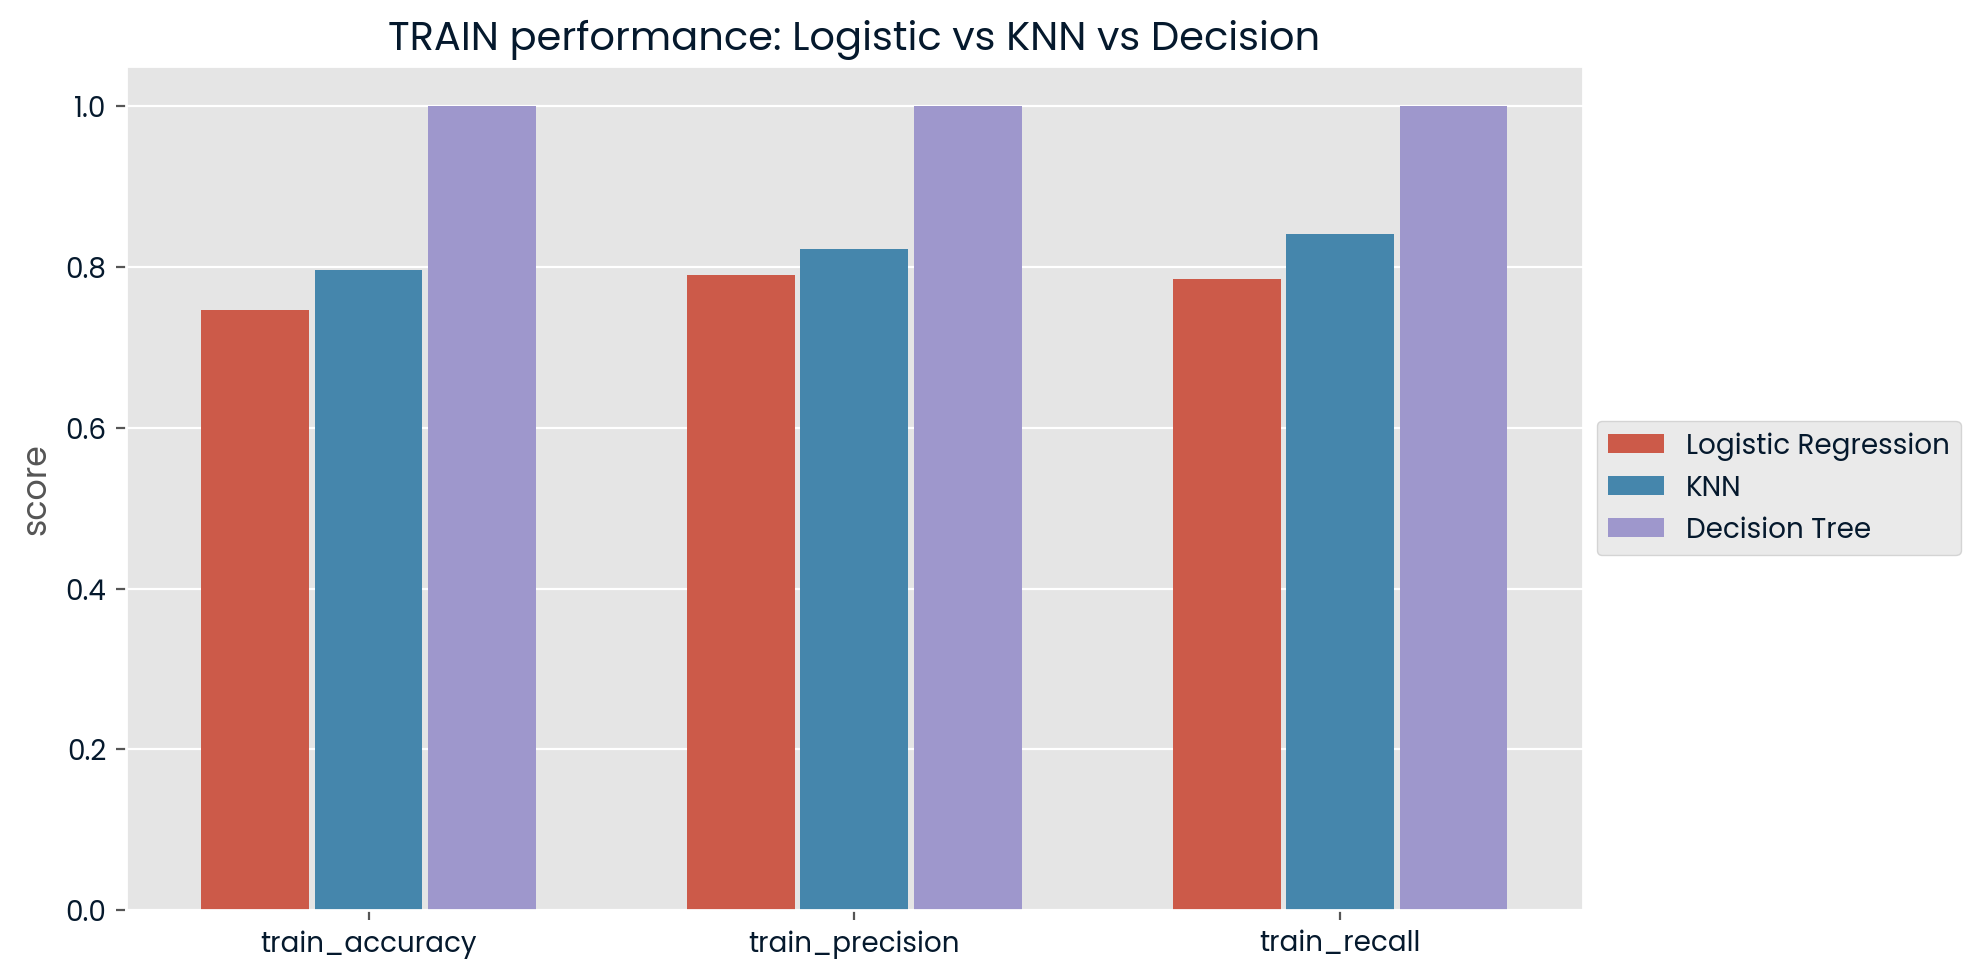

In [ ]:
# Plot train results
plt.figure(figsize=(10, 5))

# Melt the DataFrame to long format
results_melted = results_df.melt(id_vars="model", var_name="metric", value_name="score")

# subset train set results
train_metrics = results_melted[results_melted["metric"].str.startswith("train")]

# Plot train performance
sns.barplot(
    data=train_metrics, x="metric", y="score", hue="model", width=0.7, gap=0.05
).set_title("TRAIN performance: Logistic vs KNN vs Decision")
plt.xlabel("")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()

### Model Performance on TEST set
**Logistic Regression** : higher preformance on all test socres, indicates good generalization to unseen data (Accuracy - 81.6%, Precision - 83.6%, Recall - 86.0%)

**KNN** : lower performance on test scores, makes it unreliable for generalization on unseen data (Accuracy - 76.0%, Precision - 79.6%, Recall - 80.3%)

**Decision Tree** : lower performance on test scores, makes it unreliable for generalization on unseen data (Accuracy - 73.2%, Precision - 78.6%, Recall - 75.7%)

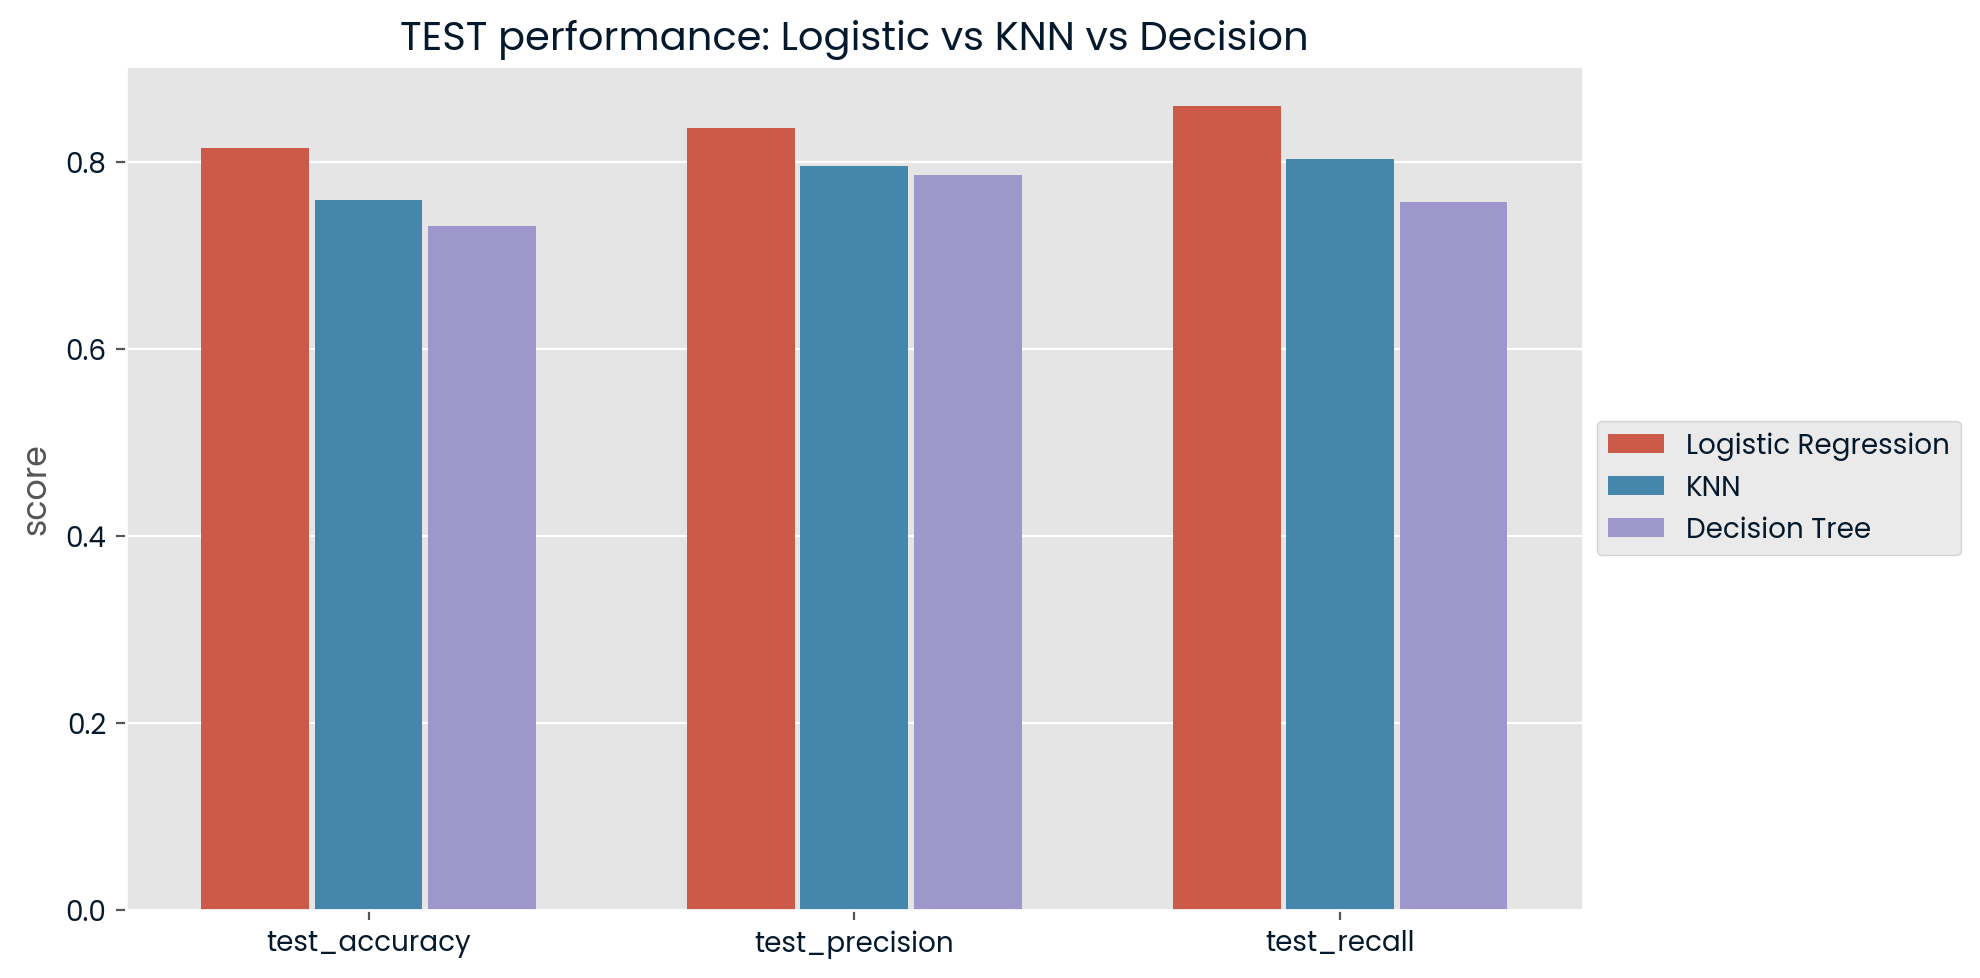

In [ ]:
# Plot test results
plt.figure(figsize=(10, 5))

# subset test set results
test_metrics = results_melted[results_melted["metric"].str.startswith("test")]

# Plot test performance
sns.barplot(
    data=test_metrics,
    x="metric",
    y="score",
    hue="model",
    width=0.7,
    gap=0.05,
).set_title("TEST performance: Logistic vs KNN vs Decision")
plt.xlabel("")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()

### Observation: Feature Importances
**Logistic Regression** supports our previous analysis of the top recipes in category (Vegetable, Potato, Pork).

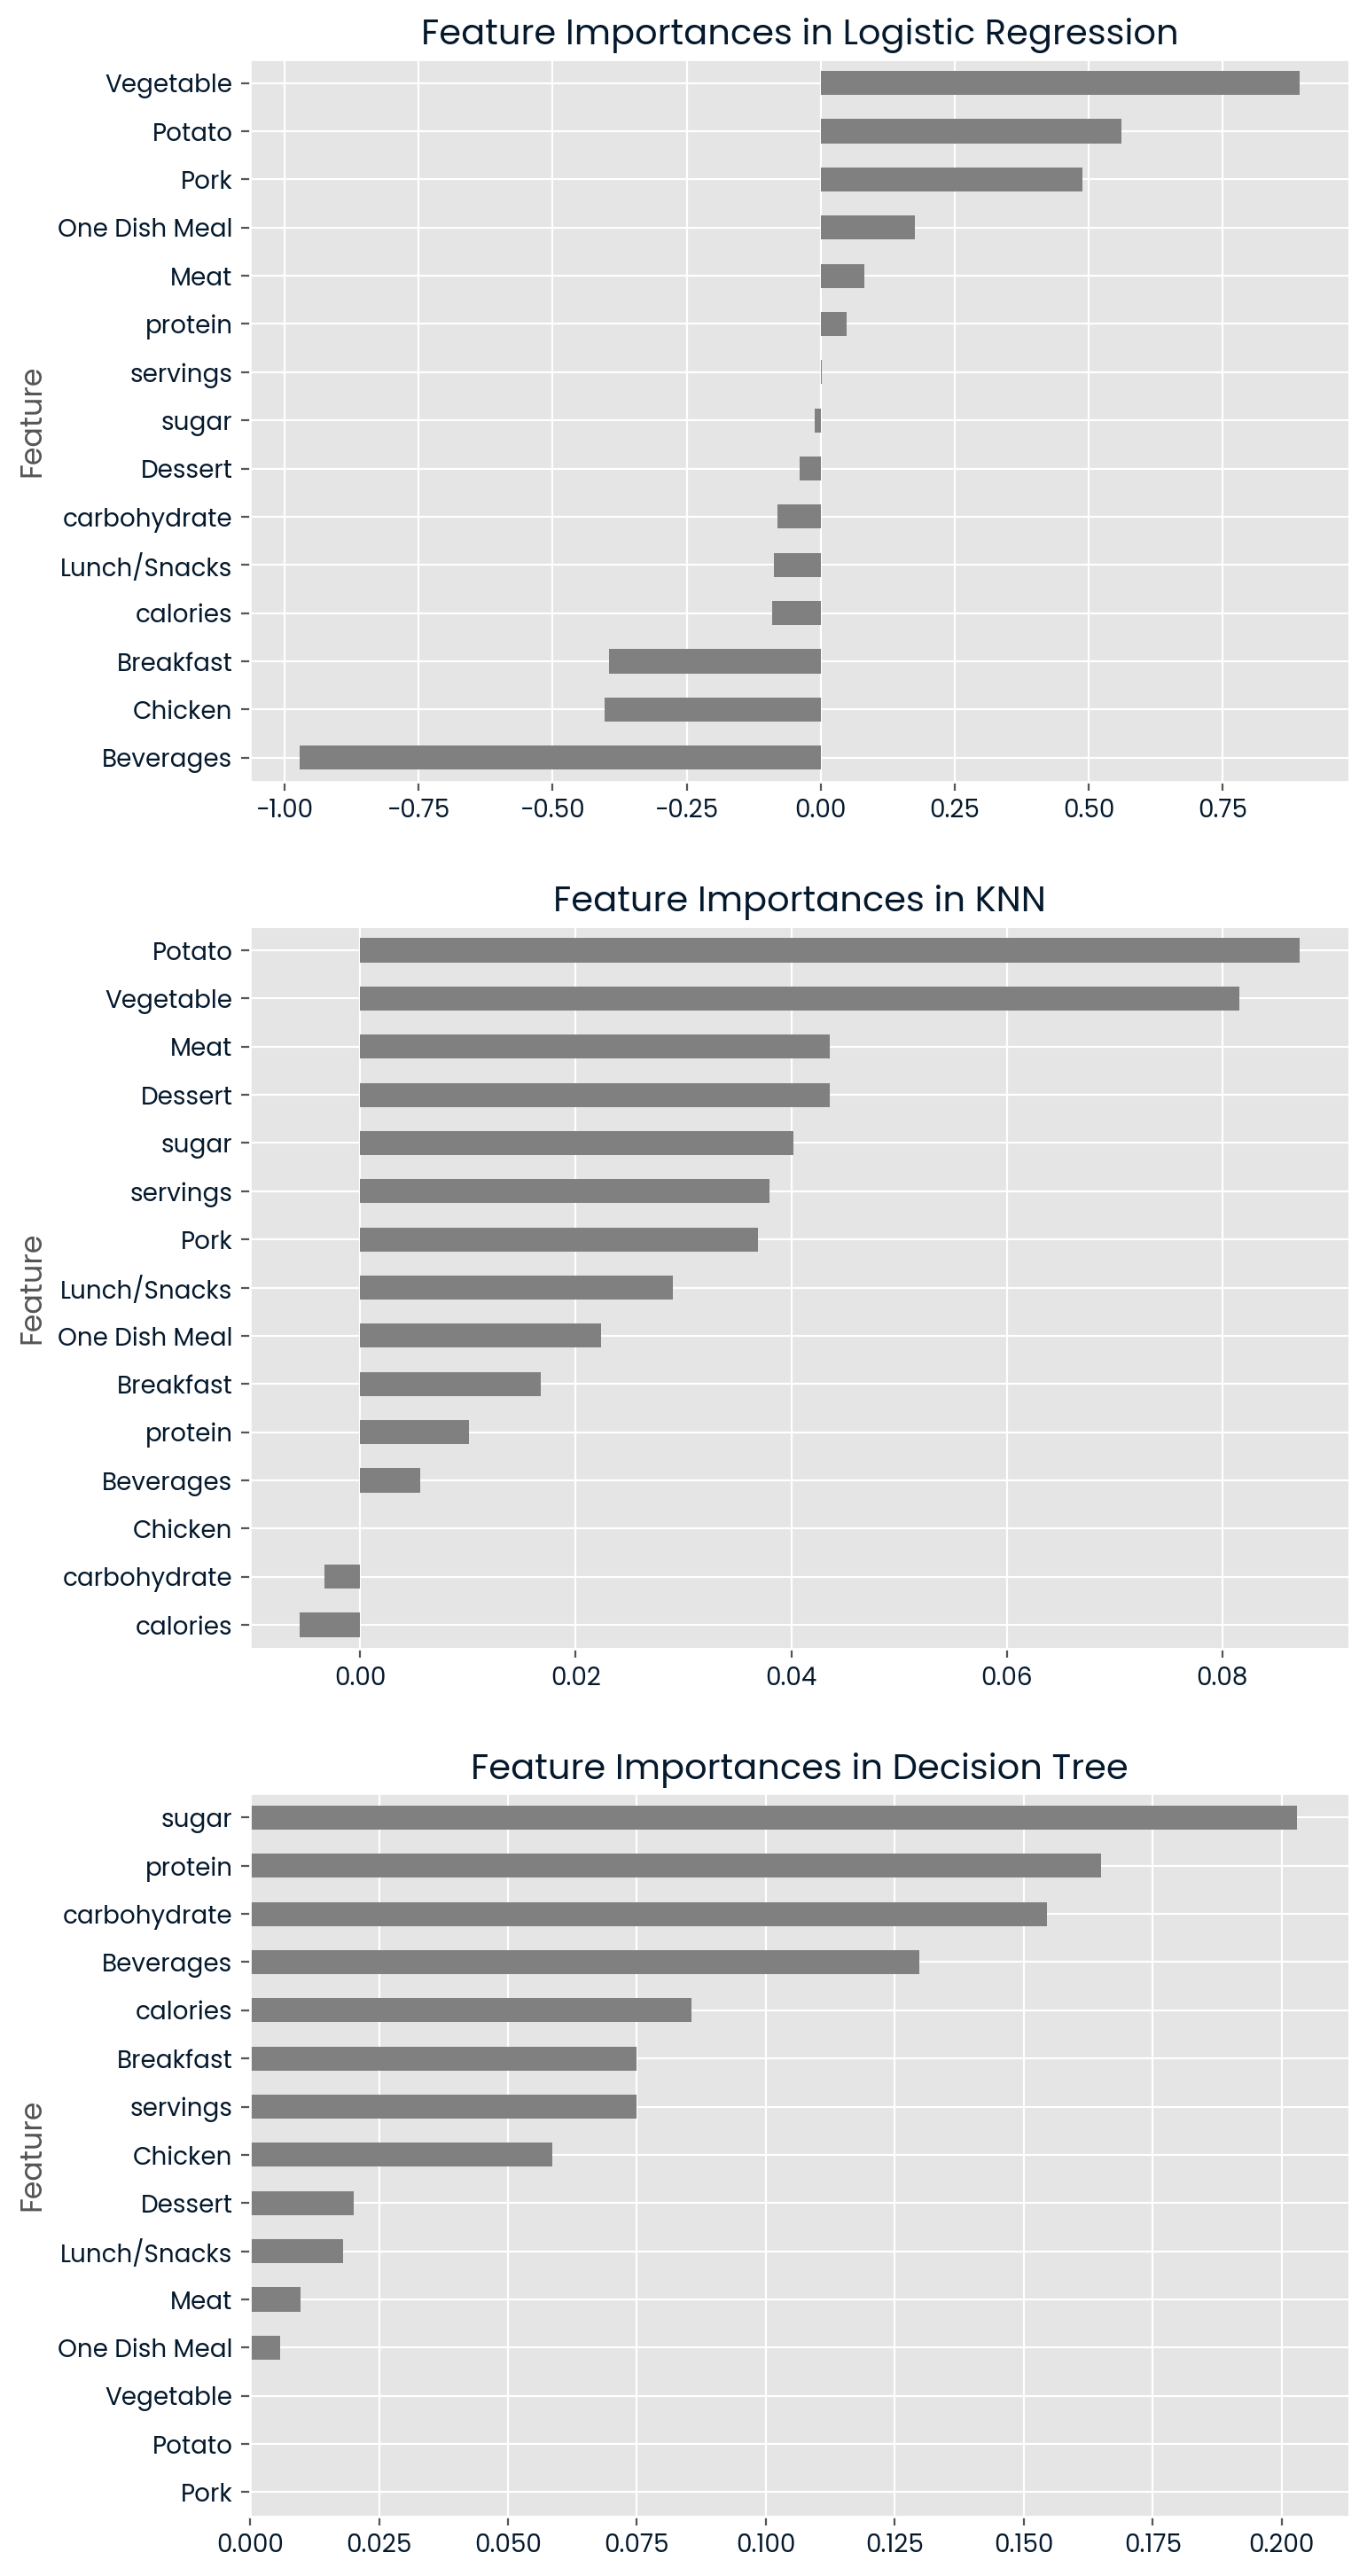

In [ ]:
# Extract feature labels
feature_names = X.columns

# Create feature importance Logistic Regression
lr_importances = lr.coef_[0]
lr_feat_importances = pd.Series(lr_importances, index=feature_names)

# Create feature importance for KNN
result = permutation_importance(knn, X_test_scaled, y_test)
knn_importances = result.importances_mean
knn_feat_importances = pd.Series(knn_importances, index=feature_names)

# Create feature importance Decision Tree
dt_importances = dt.feature_importances_
dt_feat_importances = pd.Series(dt_importances, index=feature_names)

# Set subplots & figure size
fig, axes = plt.subplots(len(models.items()), 1, figsize=(8, 18))

# Plot top features
ylabel = "Feature"
lr_feat_importances.sort_values().plot(
    kind="barh", ylabel=ylabel, color="gray", ax=axes[0]
)
knn_feat_importances.sort_values().plot(
    kind="barh", ylabel=ylabel, color="gray", ax=axes[1]
)
dt_feat_importances.sort_values().plot(
    kind="barh", ylabel=ylabel, color="gray", ax=axes[2]
)

axes[0].set_title(f"Feature Importances in {list(models.keys())[0]}")
axes[1].set_title(f"Feature Importances in {list(models.keys())[1]}")
axes[2].set_title(f"Feature Importances in {list(models.keys())[2]}")
plt.show()

### Report:
- **Precision** was identified as the key metric in the business task, prioritizing the accurate identification of 80% high-traffic recipes to minimize the exposure of unpopular ones.
- **Logistic Regression** is the more effective model for this task, achieving higher overall accuracy (81.56%) and importantly, precision (83.64%) in predicting high-traffic recipes.

## 05. Business Metric ✅

Measuring Success (KPI): Conversion Rate

Connecting with the business goal of identifying high-traffic recipes with 80% accuracy, we will use **precision** as our metric.
- **Precision** is the percentage of true positives out of all predicted positives.
- The value of K can be adjusted to reflect different business scenarios or user preferences.

In our case, we set k(%) to 80.

In [ ]:
# Define function for precision@K
def precision_at_k(y_true, y_scores, k):
    # Sort predictions by predicted probability
    sorted_indices = np.argsort(y_scores)[::-1]
    y_true_sorted = y_true.values[sorted_indices]
    top_k_predictions = y_true_sorted[:k] # Select top K predictions
    true_positives = np.sum(top_k_predictions) # Calculate precision
    return true_positives / k


KPI_results = [] # create an empty list to store results

for name, model in models.items():
    for k in [80]:
        # Test probability predictions
        y_test_scores = model.predict_proba(X_test_scaled)[:, 1]
        test_precision = precision_at_k(y_test, y_test_scores, k)

        # Append KPI_results to the list
        KPI_results.append([name, k, test_precision])

# Create a dataframe from the KPI_results
KPI_results = pd.DataFrame(
    KPI_results, columns=["model", "precision_@_K", "test_score"]
)
print(KPI_results.round(2))

                 model  precision_@_K  test_score
0  Logistic Regression             80        0.88
1                  KNN             80        0.84
2        Decision Tree             80        0.80


We use a key metric called **High Traffic Conversion Rate** to measure how well our models predict recipes that will bring a lot of visitors to the website.

Here’s the performance of each model in predicting 80% high traffic for recipes:

- **Logistic Regression** : Scored 88%
- **KNN** : Scored 84%
- **Decision Tree** : Scored 80%

The **Logistic Regression** model is more reliable for picking out popular recipes at 80% precision.

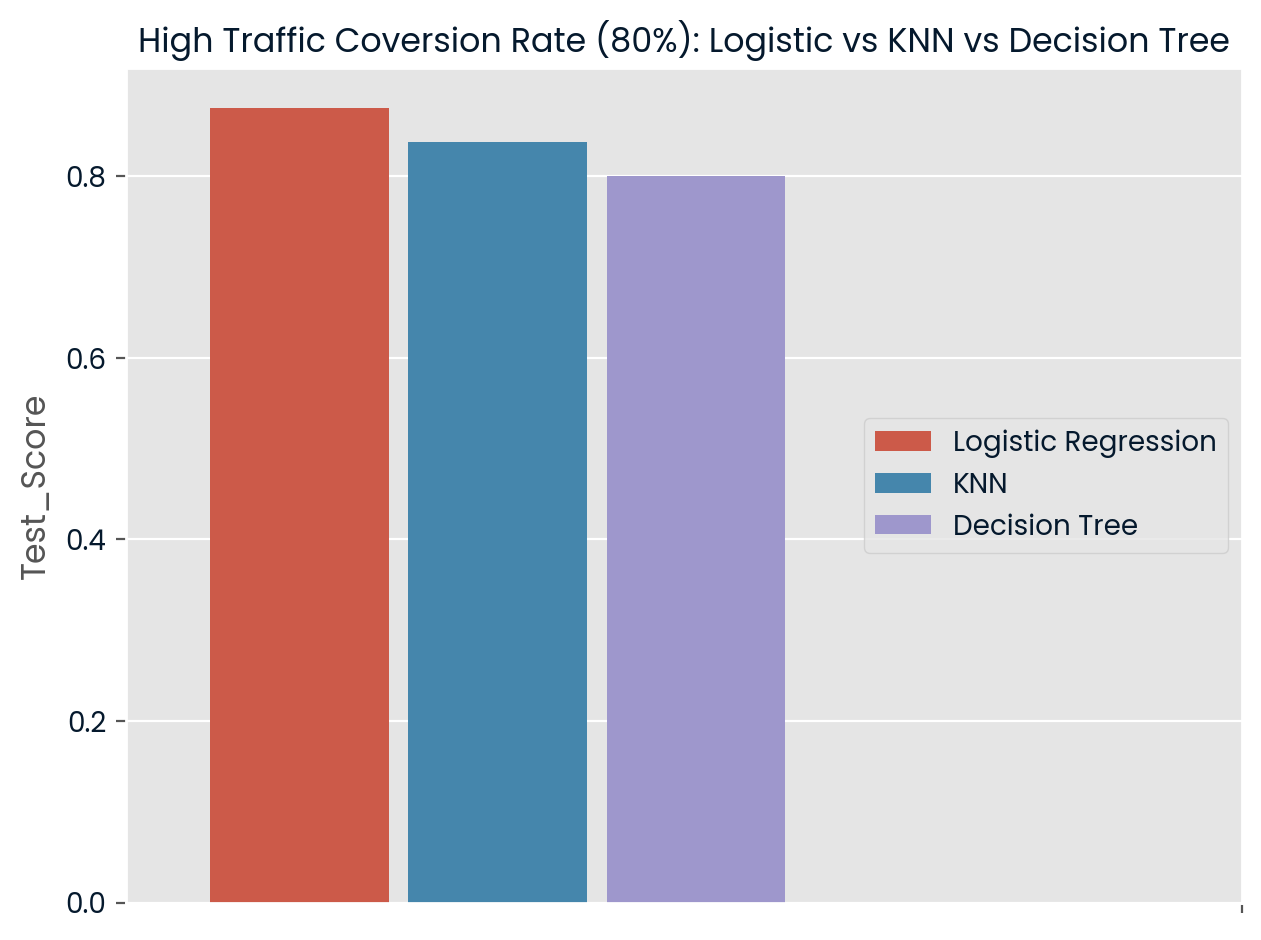

In [ ]:
# Plot train result

# Melt dataframe to long format
KPI_df = KPI_results.drop(["precision_@_K"], axis=1).melt(
                                                            id_vars="model",
                                                            var_name="metric",
                                                            value_name="score"
                                                    )

# Plot test performance
sns.barplot(KPI_df, x="metric", y="score", hue="model", gap=0.1)\
            .set_title("High Traffic Coversion Rate (80%): Logistic vs KNN vs Decision Tree",
                       fontsize=12
)
plt.ylabel("Test_Score")
plt.xlabel("")
plt.xticks("")
plt.legend(loc="center right", bbox_to_anchor=(1, 0.5))
plt.tight_layout()

## Business Recommendations:
1. Focus on **6-serving** recipes due to their higher traffic.
2. Allocate resources to **Vegetable**, **Potato**, and **Pork** categories, which draw the most visitors.
3. Assess and improve low engagement in the **Beverages** category.
4. Collect more user behavior data to refine predictive models.
5. Consider A/B testing to validate the model's predictions.

By implementing these recommendations, the business can optimize its content strategy, attract more traffic, and improve user engagement, leading to boost in subscriptions. The data science team will continuously monitor model performance and adapt strategies based on available data, evolving trends and user preferences.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation